In [1]:
import pandas as pd
import glob
import os
import re

import re
import pandas as pd
import os
import pytz
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
import matplotlib.gridspec as gridspec
import itertools
import calendar
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from IPython.display import display

in_color = 'blue'
out_color = 'green'
ratio_color = 'black'

In [64]:
CURR_COL = 'p_10_0_um_comb'
VAR_NAME = 'p_10.0_um'
VAR_LATEX = '10.0 $\\mu m$ particle counts'
VAR_UNIT = ''
os.makedirs(f'graphs/{VAR_NAME}/time_series', exist_ok=True)
os.makedirs(f'graphs/{VAR_NAME}/diurnals', exist_ok=True)
os.makedirs(f'graphs/{VAR_NAME}/weekly', exist_ok=True)
os.makedirs(f'graphs/{VAR_NAME}/monthly', exist_ok=True)

In [50]:
# Define custom positions for boxplots: Two close, then a gap
def generate_positions(n_groups, spacing=2.2, inner_spacing=0.8):
    positions = []
    base = 1  # Start position
    for _ in range(n_groups):
        positions.append(base)  # First box in pair
        positions.append(base + inner_spacing)  # Second box in pair
        base += spacing  # Larger gap before next pair
    return positions

def set_box_outline_colors(box, colors):
    color_cycle = itertools.cycle(colors)
    for patch in box['boxes']:
        patch.set(color=next(color_cycle))  # Set box outline color
    colors = [colors[0], colors[0], colors[1], colors[1]]
    color_cycle = itertools.cycle(colors)
    for whisker in box['whiskers']:  # Set whisker colors
        whisker.set(color=next(color_cycle))
    for cap in box['caps']:  # Set cap colors
        cap.set(color=next(color_cycle))
    for median in box['medians']:  # Make median lines black for contrast
        median.set(color="red")


#### Time series plot calibrated atm

Processed Dhakeshwari Home


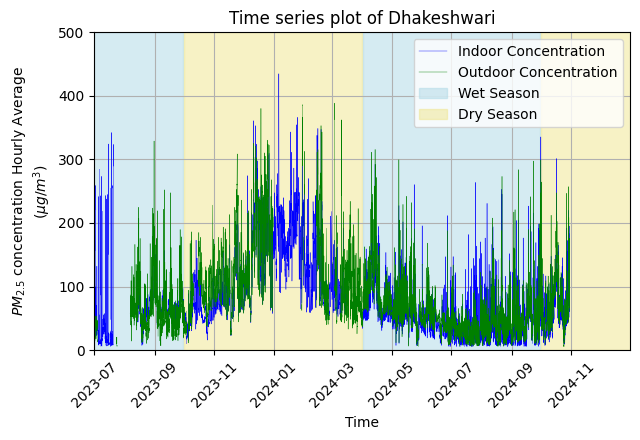

Processed Mohakhali Home


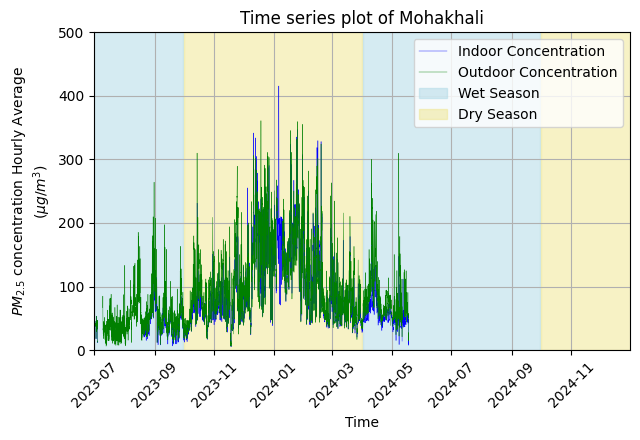

Processed Mohammadpur Home


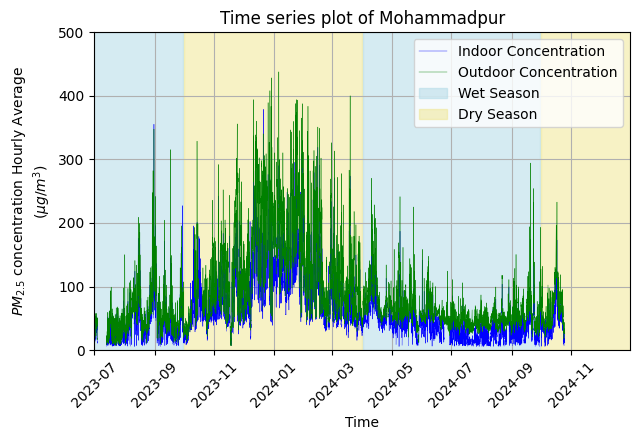

Processed Banasree Home


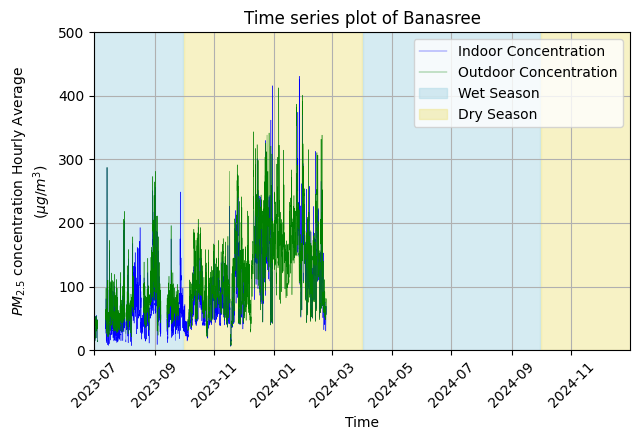

Processed Nakhalpara Home


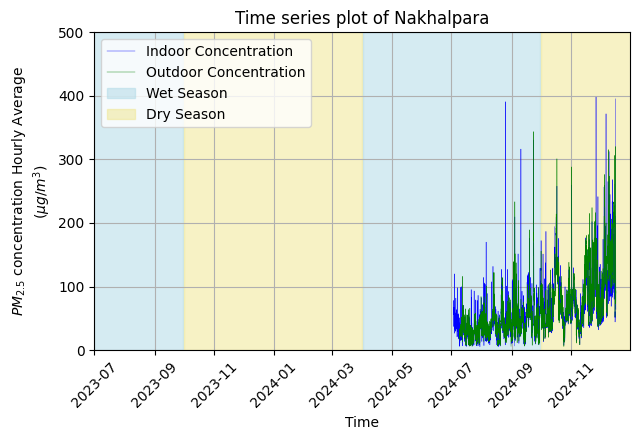

Processed Khilgawn Home


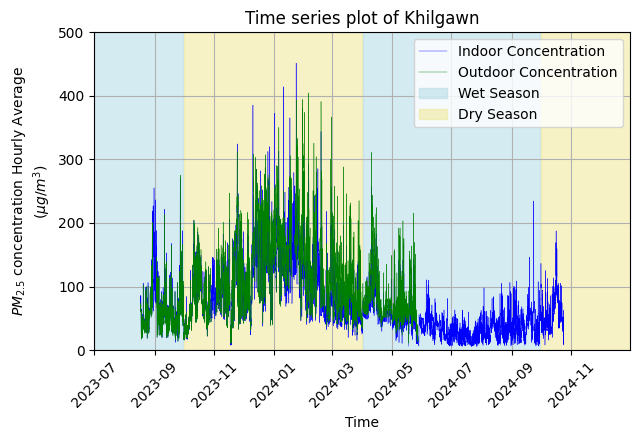

Processed Dania Home


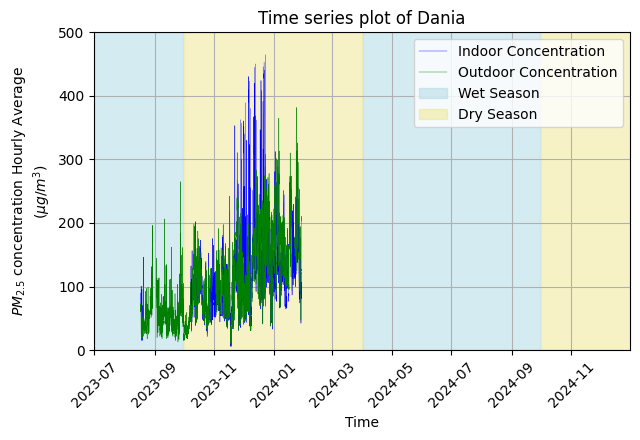

Processed Badda Home


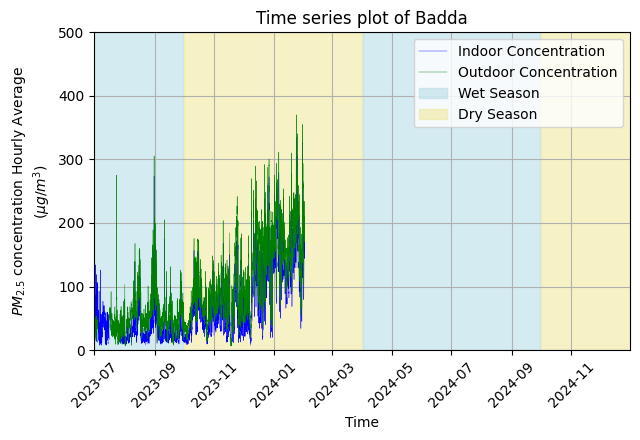

In [ ]:
# ## Time series plot indoor and outdoor
# ## plotting

# dir = 'hourly_average'
# target = 'graphs/time series'

# subdirs = ["Dhakeshwari Home","Mohakhali Home", "Mohammadpur Home", "Banasree Home", "Nakhalpara Home", "Khilgawn Home"] + ["Dania Home", "Badda Home"]
# # subdirs = ["Mohakhali Home"]

# for home in subdirs:
#     indoor_df = pd.read_csv(f'hourly_average/{home}/Indoor.csv')
#     indoor_df['time'] = pd.to_datetime(indoor_df['time'])
#     indoor_df = indoor_df[['time', CURR_COL]]
#     indoor_df.columns = ['time', 'pm2_5_indoor']

#     outdoor_df = pd.read_csv(f'hourly_average/{home}/Outdoor.csv')
#     outdoor_df['time'] = pd.to_datetime(outdoor_df['time'])
#     outdoor_df = outdoor_df[['time', CURR_COL]]
#     outdoor_df.columns = ['time', 'pm2_5_outdoor']

#     combined_df = pd.merge(indoor_df, outdoor_df, on='time')
#     combined_df['IO_ratio'] = combined_df['pm2_5_indoor'] / combined_df['pm2_5_outdoor']
#     combined_df['IO_ratio'] = combined_df['IO_ratio'].apply(lambda x : x if (x>0 and x < 2) else float('nan'))
#     # combined_df = combined_df.dropna(subset = ['IO_ratio'])
#     print(f"Processed {home}")

#     plt.figure(figsize=(6.5, 4.5))

#     # Plot the PM2.5 concentrations
#     plt.plot(combined_df['time'], combined_df['pm2_5_indoor'], label="Indoor Concentration", color=in_color, linestyle='-', markersize=3, linewidth = .3)
#     plt.plot(combined_df['time'], combined_df['pm2_5_outdoor'], label="Outdoor Concentration", color=out_color, linestyle='-', markersize=3, linewidth = .3)
#     # Define the background shading for wet and dry seasons
#     start_date = 2023
#     end_date =  2025
#     for year in range(start_date, end_date):
#         plt.axvspan(pd.Timestamp(f'{year}-04-01'), pd.Timestamp(f'{year}-09-30'), color='lightblue', alpha=0.5, label='Wet Season' if year == start_date else '')  # Wet season
#         plt.axvspan(pd.Timestamp(f'{year}-10-01'), pd.Timestamp(f'{year+1}-03-31'), color='khaki', alpha=0.5, label='Dry Season' if year == start_date else '')  # Dry season

#     # Labels and title
#     plt.xlabel('Time')
#     plt.ylabel(r'{VAR_LATEX} Hourly Average' + '\n' + r'{VAR_UNIT}')
#     plt.title(f'Time series plot of {home.split(' ')[0]}')
#     # plt.text(2, 3, "Hello")
#     plt.legend()
#     plt.grid(True)
#     plt.xticks(rotation=45)  # Rotate time labels for better visibility
#     plt.xlim(pd.to_datetime('2023-07-01'), pd.to_datetime('2024-12-31'))
#     plt.ylim((0, 500))
#     plt.tight_layout()
#     #plt.savefig(os.path.join(target, f'{home}.png'), dpi = 300)
#     plt.show()
    



0it [00:00, ?it/s]

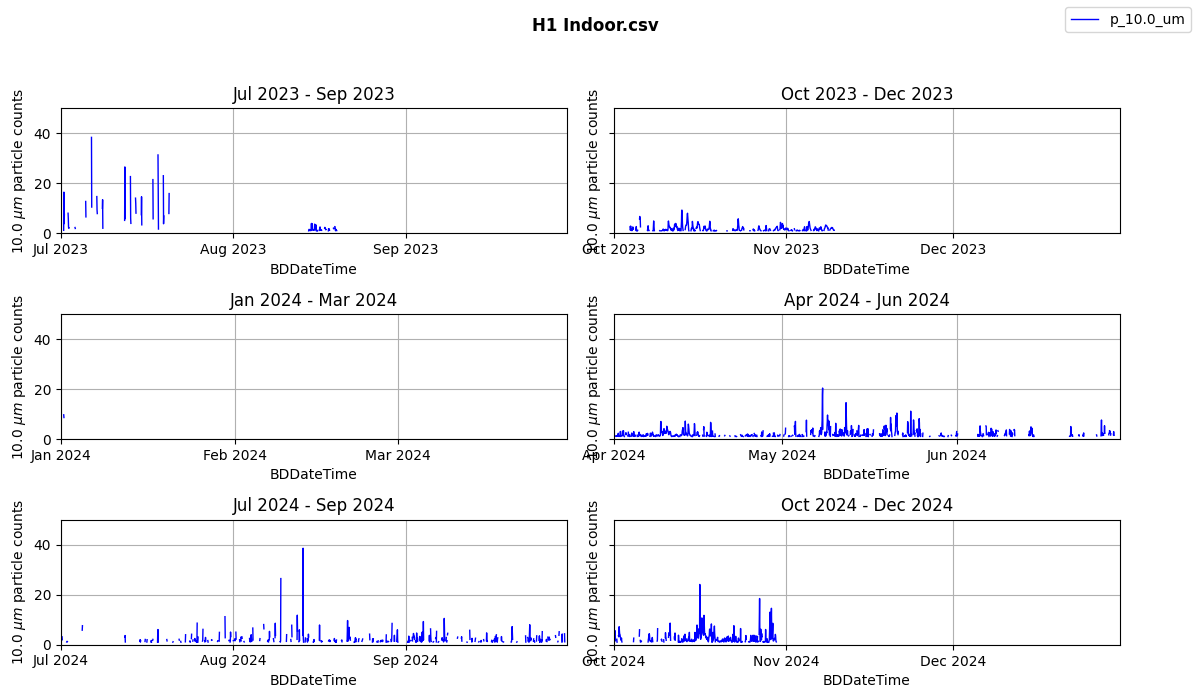

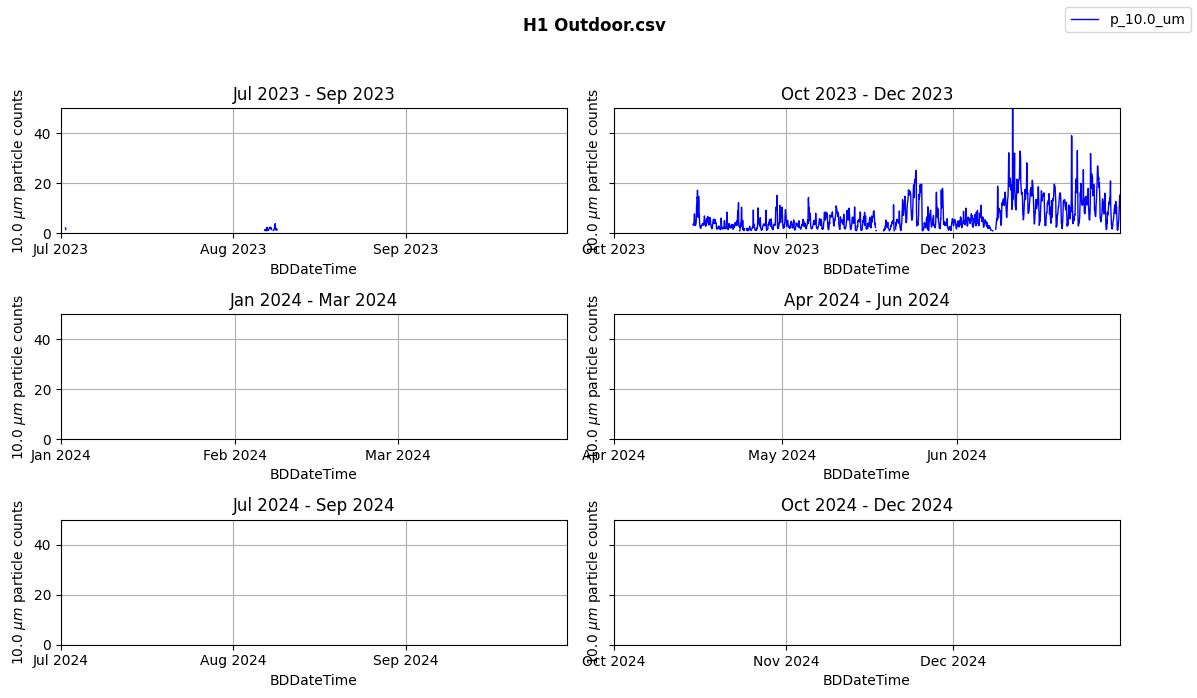

0it [00:00, ?it/s]

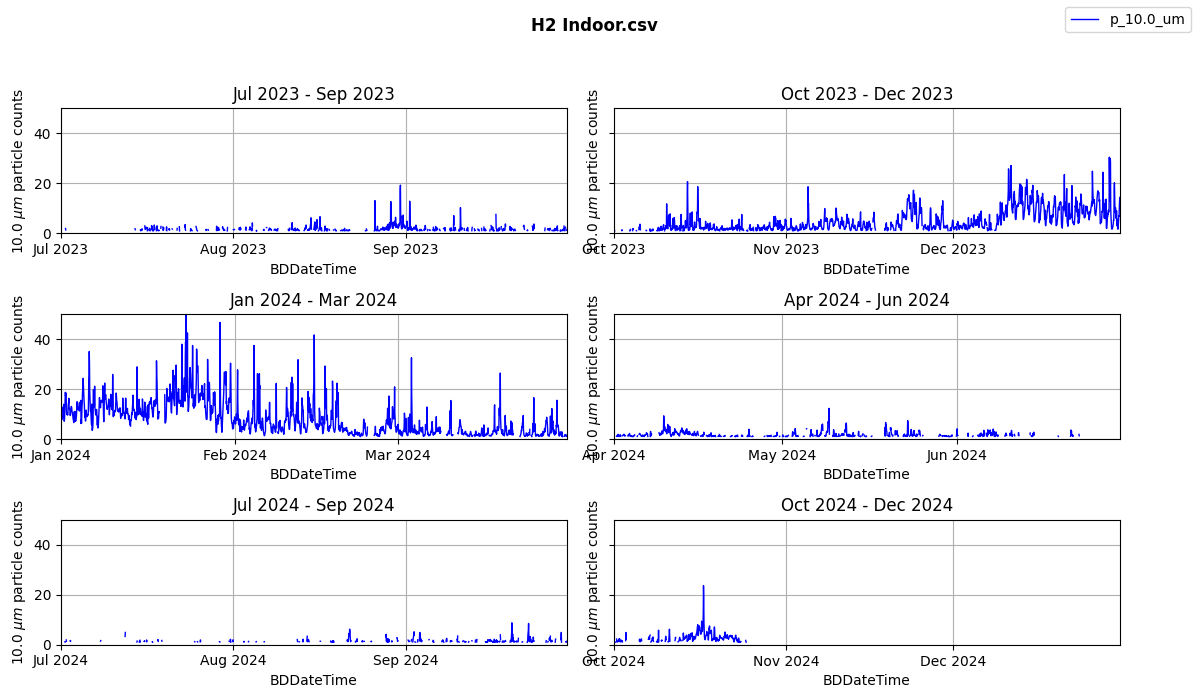

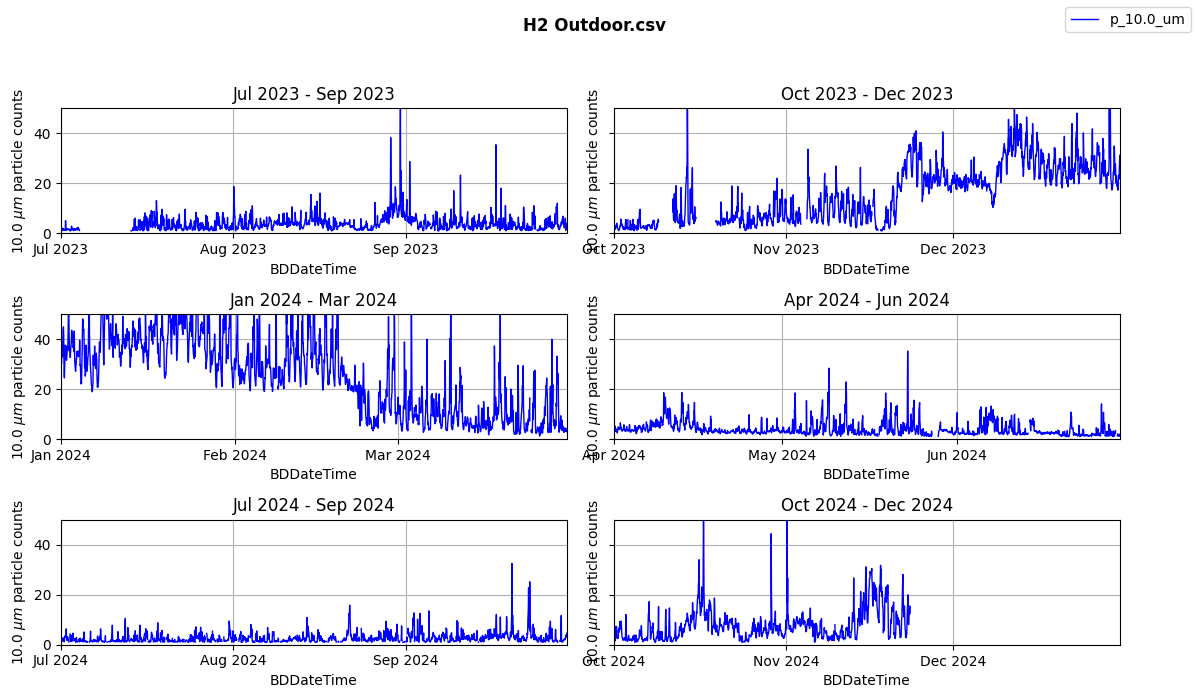

0it [00:00, ?it/s]

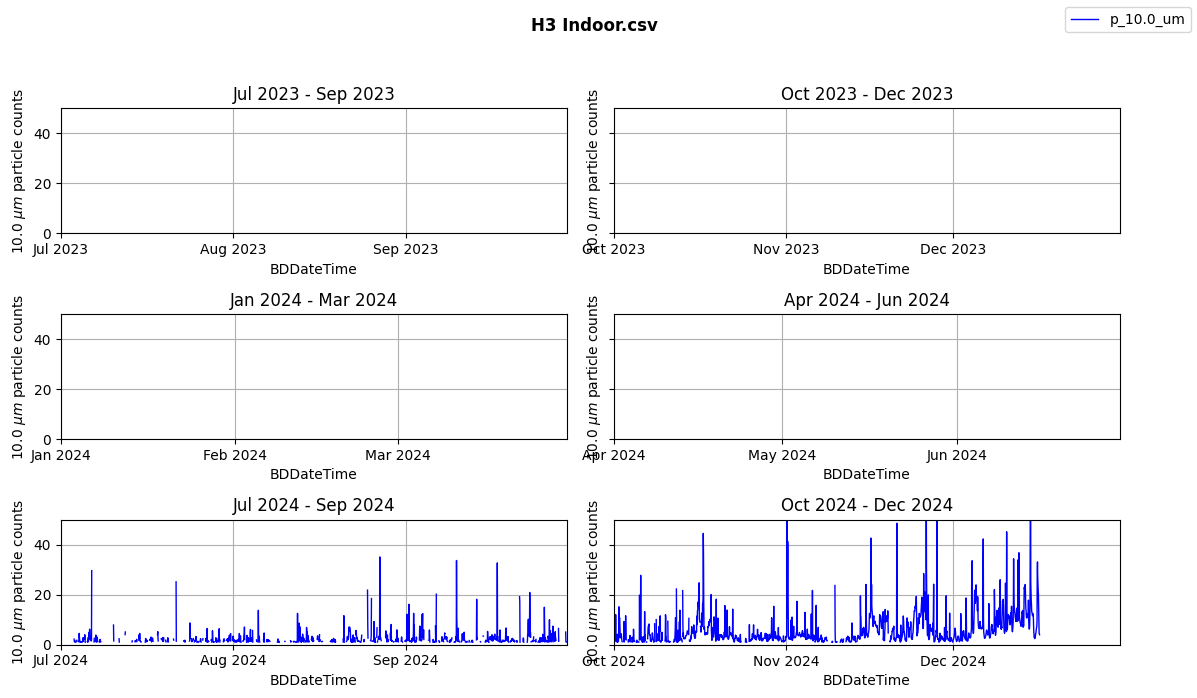

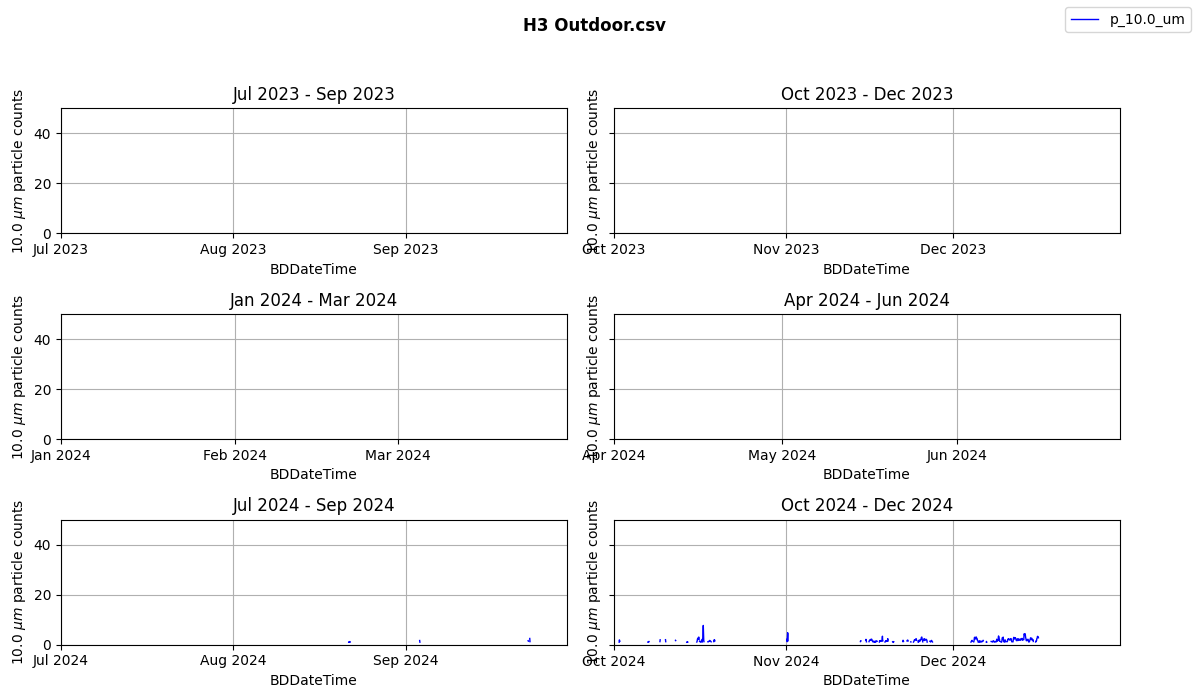

0it [00:00, ?it/s]

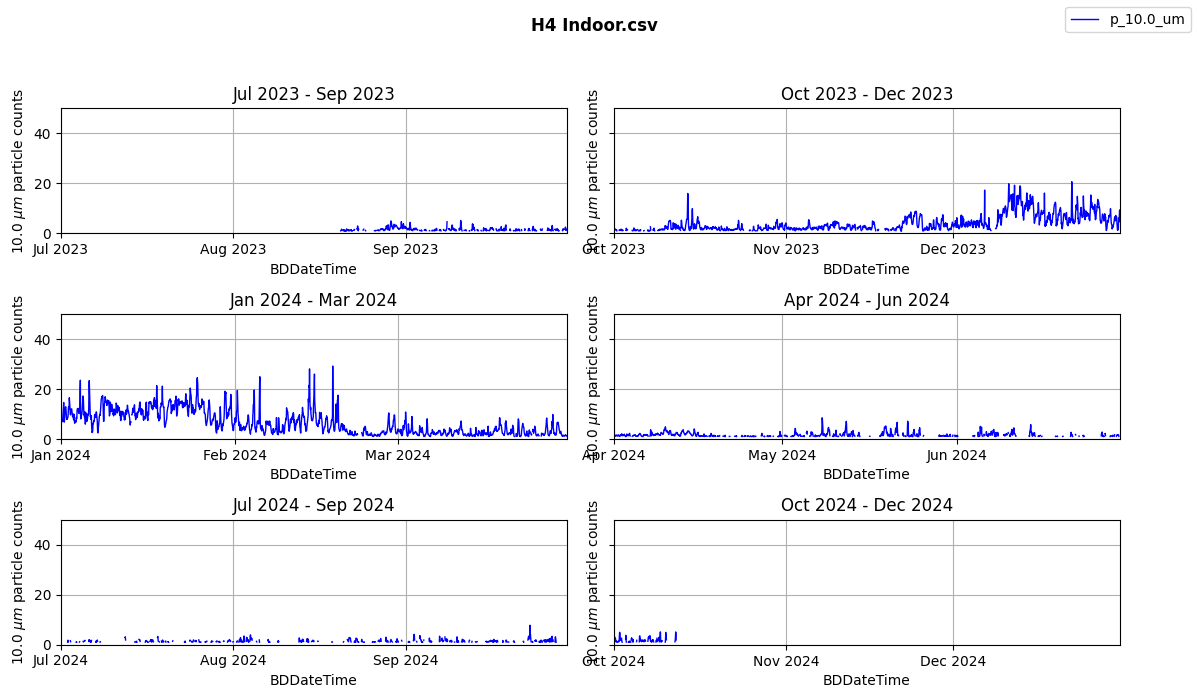

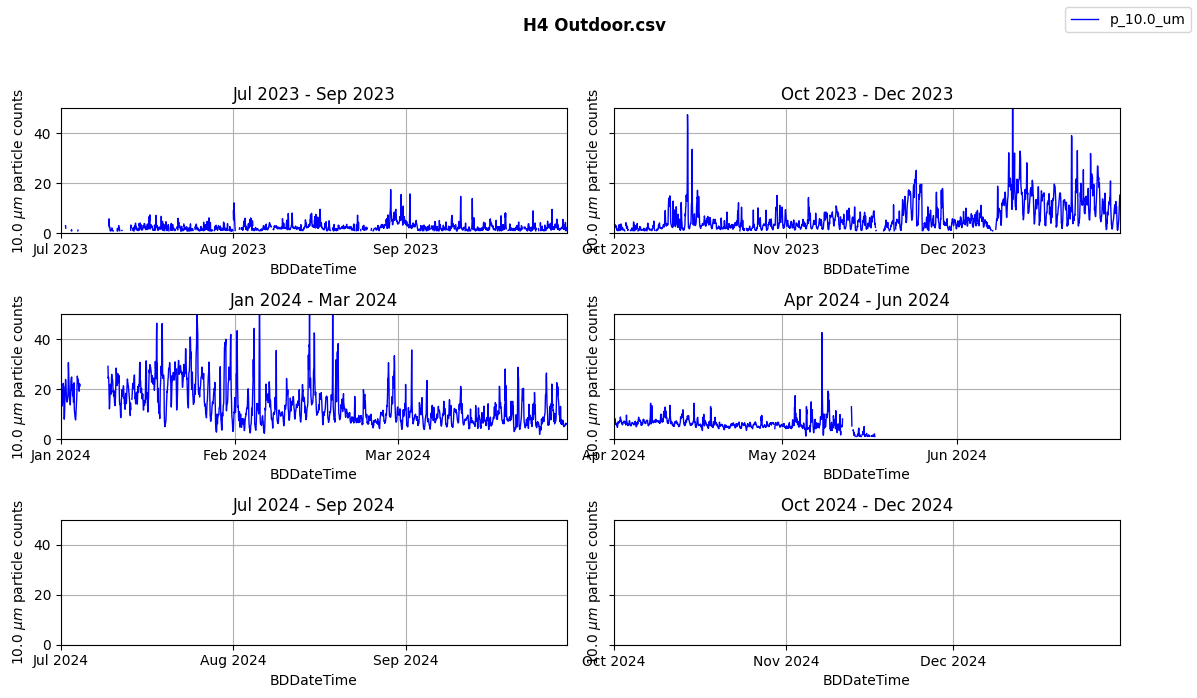

0it [00:00, ?it/s]

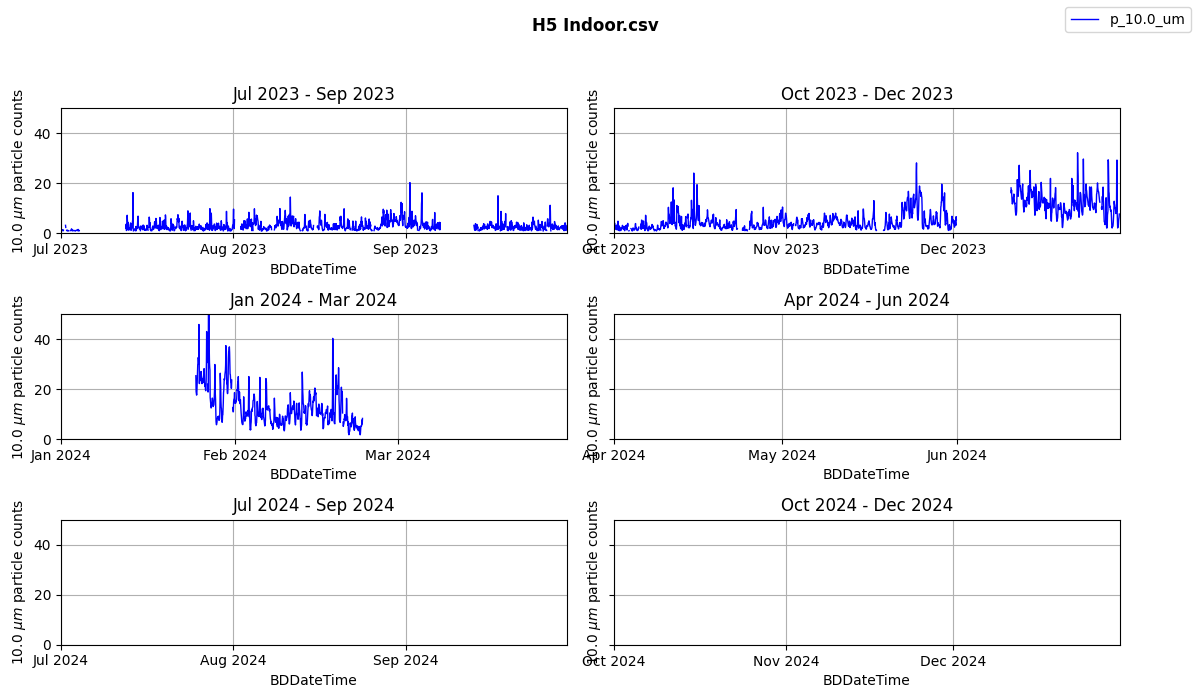

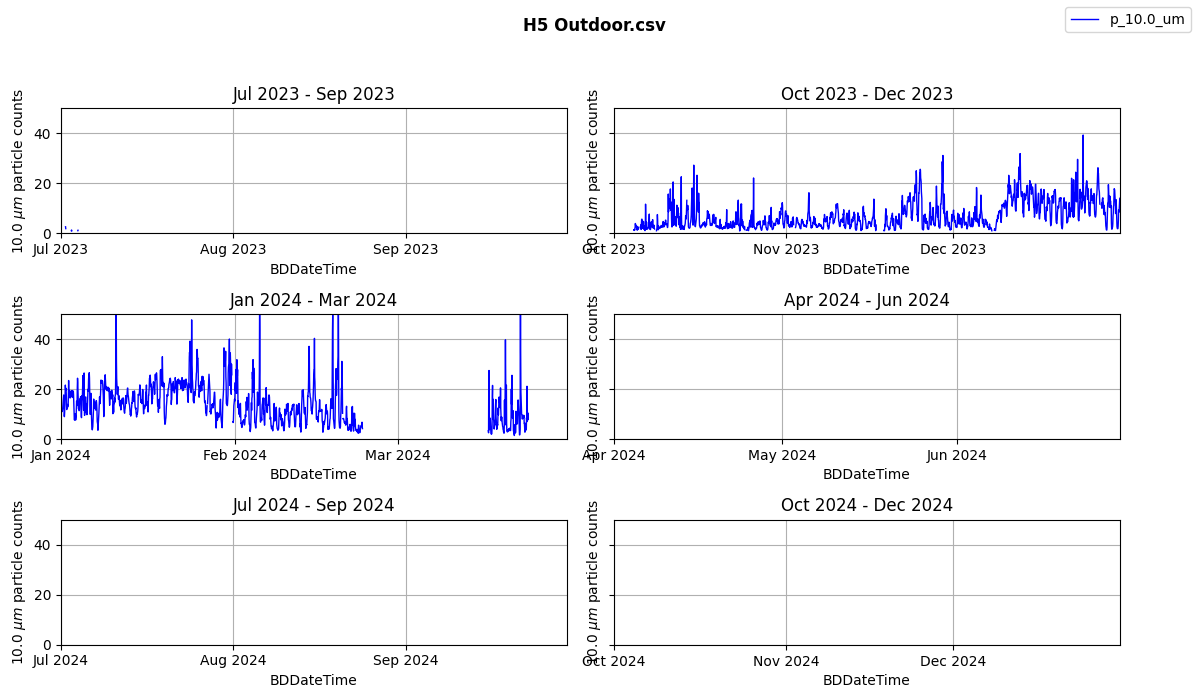

0it [00:00, ?it/s]

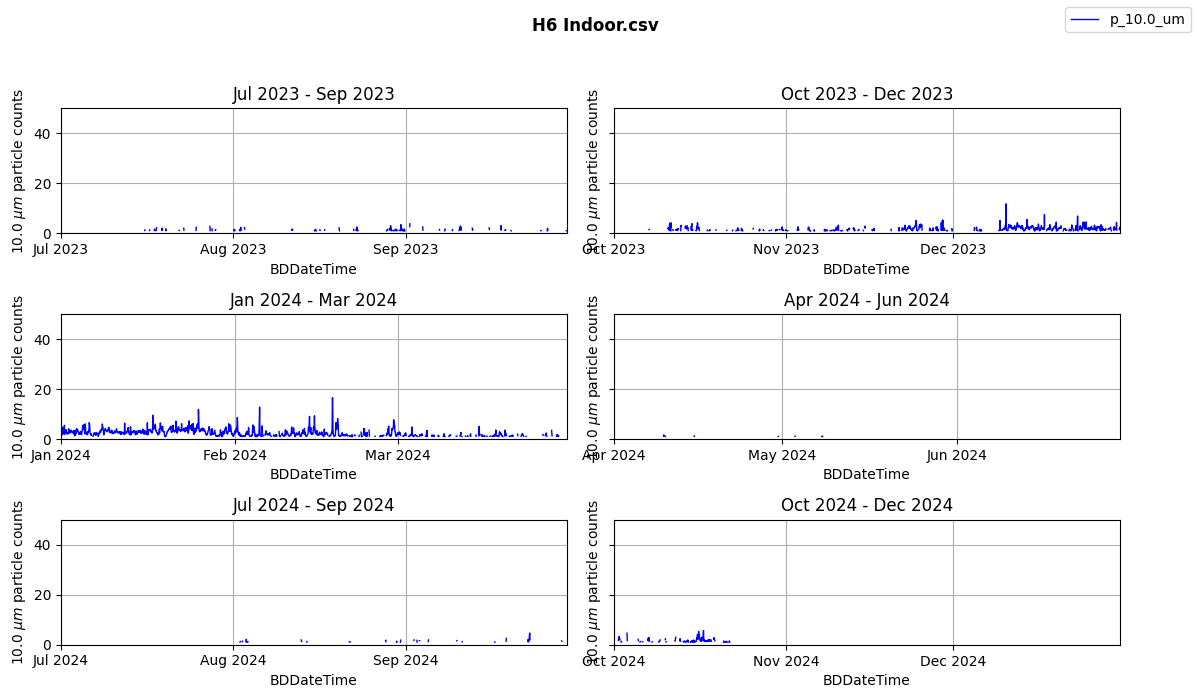

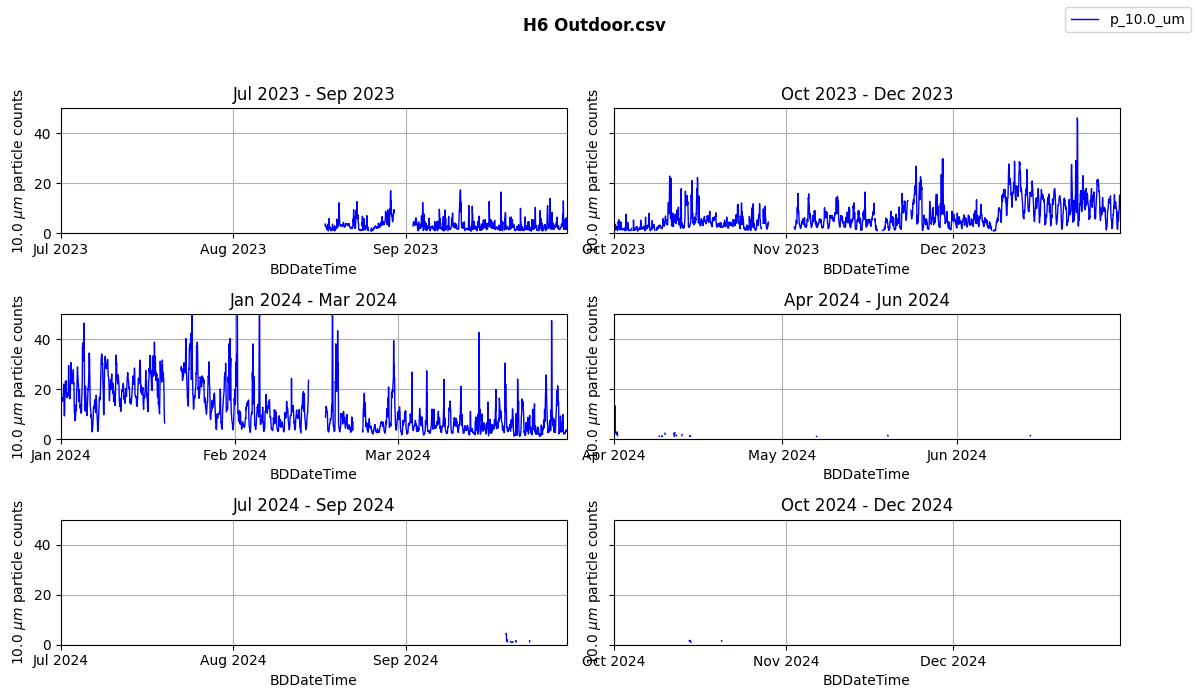

In [66]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.dates as mdates

dir = 'hourly_average'
subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
for station in subdirs:
    csv_files = [f for f in os.listdir(os.path.join(dir, station)) if f.endswith('.csv')]
    dfs = [pd.read_csv(os.path.join(dir, station, f)) for f in csv_files]

    # Assuming `dfs` is the list of dataframes
    for i, df in tqdm(enumerate(dfs)):
        df_sample = df.copy()
        
        # Ensure 'time' is datetime
        df_sample['time'] = pd.to_datetime(df_sample['time'])

        # Create a list of 3-month periods from July 2023 to December 2024
        start_dates = pd.date_range(start="2023-07-01", end="2024-12-31", freq="3MS")
        end_dates = start_dates + pd.DateOffset(months=3) - pd.Timedelta(days=1)

        fig, axs = plt.subplots(3, 2, figsize=(12, 7), sharey=True)
        axs = axs.flatten()

        for idx, (start, end) in enumerate(zip(start_dates, end_dates)):
            if idx >= len(axs):  # only plot first 8 periods
                break

            subset = df_sample[(df_sample['time'] >= start) & (df_sample['time'] <= end)]
            axs[idx].plot(subset['time'], subset[CURR_COL], linewidth=1, color='blue', label=VAR_NAME)
            # axs[idx].plot(subset['time'], subset['pm2_5_atm_calibrated'], linewidth=1, color='#0072B2', label='ATM Calibrated')
            
            axs[idx].set_title(f"{start.strftime('%b %Y')} - {end.strftime('%b %Y')}")
            axs[idx].set_xlabel('BDDateTime')
            axs[idx].set_ylabel(VAR_LATEX)
            # axs[idx].set_ylim(0, 500)
            axs[idx].set_xlim(start, end)  # proper x-limits
            axs[idx].grid()

            # Set x-axis ticks at 1-month intervals
            axs[idx].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
            axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
            axs[idx].tick_params(axis='x', rotation=0)  # horizontal labels
            axs[idx].set_ylim(0, 50)

        # Add legend once for the figure
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right')

        plt.suptitle(station + ' ' + csv_files[i], weight='bold')
        plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # leave space for legend and title
        plt.savefig(f'graphs/{VAR_NAME}/time_series/{station}_{csv_files[i]}.png')
        plt.show()



### Monthlys

processing H1
processing H2


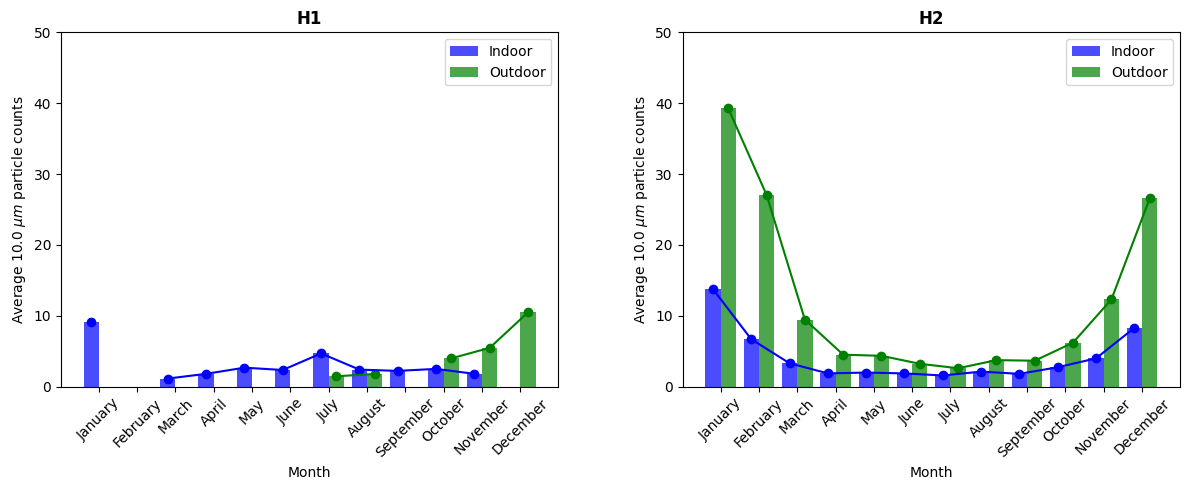

processing H3
processing H4


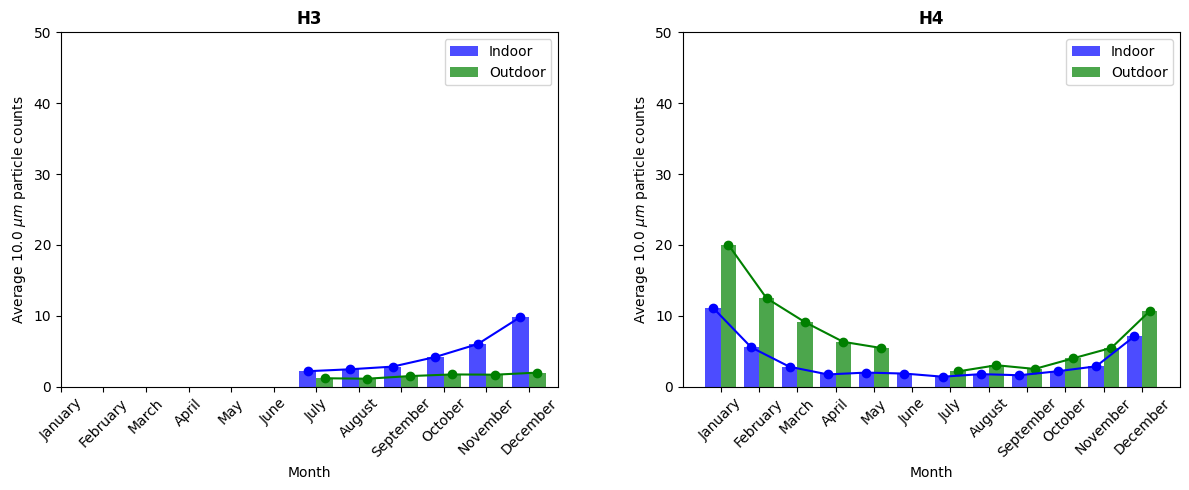

processing H5
processing H6


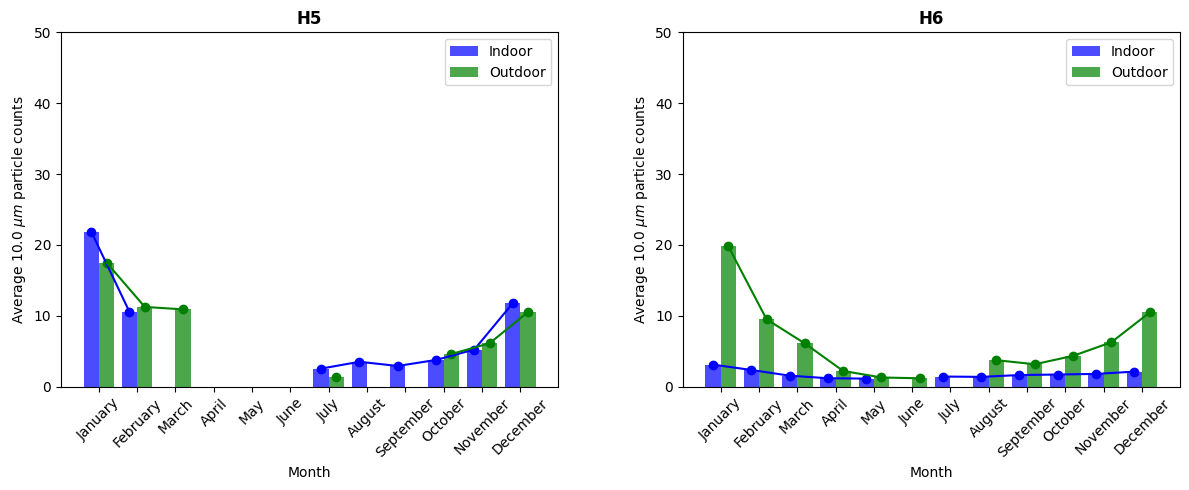

In [68]:
## I/O Time dinural (full)
## plotting

dir = 'hourly_average'
savedir = f'graphs/{CURR_COL}/monthly average'

# subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) if "Home" in d]
subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]


i = 1
for home in subdirs:
    print(f"processing {home}")
    indoor_df = pd.read_csv(f'hourly_average/{home}/Indoor.csv')
    indoor_df['time'] = pd.to_datetime(indoor_df['time'])
    indoor_df = indoor_df[['time', CURR_COL]]

    outdoor_df = pd.read_csv(f'hourly_average/{home}/Outdoor.csv')
    outdoor_df['time'] = pd.to_datetime(outdoor_df['time'])
    outdoor_df = outdoor_df[['time', CURR_COL]]

    # Extract month numbers for grouping
    indoor_df['Month'] = indoor_df['time'].dt.month
    outdoor_df['Month'] = outdoor_df['time'].dt.month

    all_months = [i for i in range(1, 13)]

    # Calculate monthly average PM2.5 concentrations
    indoor_monthly_avg = indoor_df.groupby('Month')[CURR_COL].mean().reindex(all_months, fill_value=float('nan'))
    outdoor_monthly_avg = outdoor_df.groupby('Month')[CURR_COL].mean().reindex(all_months, fill_value=float('nan'))

    if home in ["Dania Home", "Badda Home"]:
        indoor_monthly_avg[indoor_monthly_avg.index.isin([4, 5, 6, 7, 8, 9])] = float('nan')
        outdoor_monthly_avg[outdoor_monthly_avg.index.isin([4, 5, 6, 7, 8, 9])] = float('nan')
    # Get month names instead of numbers
    month_labels = [calendar.month_name[m] for m in indoor_monthly_avg.index]  # Convert 1-12 to month names

    # Define X-axis positions
    x = np.arange(len(month_labels))  

    # Plot bar chart
    width = 0.4

    if i== 1:
        plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, i)
    plt.bar(x - width/2, indoor_monthly_avg, width=width, label="Indoor", alpha=0.7, color='blue')
    plt.bar(x + width/2, outdoor_monthly_avg, width=width, label="Outdoor", alpha=0.7, color='green')
    plt.title(home.split(' ')[0], fontsize = 12, fontweight = "bold")

    plt.plot(x - width/2, indoor_monthly_avg,color='blue')
    plt.plot(x + width/2, outdoor_monthly_avg, color = 'green')

    plt.scatter(x - width/2, indoor_monthly_avg,color='blue')
    plt.scatter(x + width/2, outdoor_monthly_avg, color = 'green')

    # Labels and title
    plt.xlabel("Month")
    plt.ylabel(f"Average {VAR_LATEX}")
    # plt.title(f"Monthly Average {VAR_LATEX}")

    # Set month names as x-axis labels
    plt.xticks(x, month_labels, rotation=45)  # Set proper month labels with rotation
    plt.ylim((0, 50))
    # plt.text(4, 30_000, home.split(' ')[0], fontsize = 12, fontweight = "bold")
    plt.legend()
    # plt.grid(axis='y')
    # Show the plot
    if i == 1:
        i = 2
    else:
        
        i = 1
        plt.tight_layout()
        plt.subplots_adjust(wspace=0.25, hspace=0.6)
        plt.savefig(f'graphs/{VAR_NAME}/monthly/{home}.png', dpi = 300)
        plt.show()
        

#### Combined monthly

  0%|          | 0/6 [00:00<?, ?it/s]

Processing H1
Processing H2
Processing H3
Processing H4
Processing H5
Processing H6


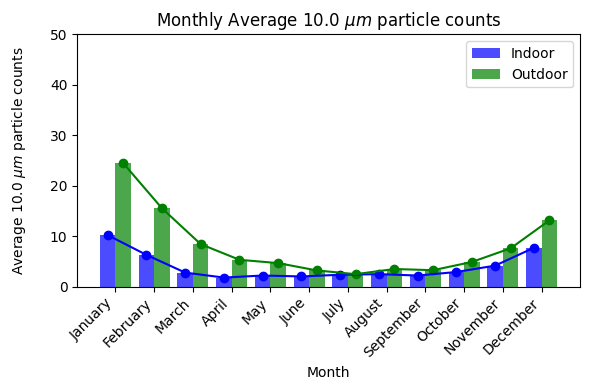

In [70]:
## Monthly average box plot

Indoor_dfs = []
Outdoor_dfs = []

dir = 'hourly_average'
subdirs = [f for f in os.listdir(dir) if os.path.isdir(os.path.join(dir, f)) ]
for subdir in tqdm(subdirs):
    print(f'Processing {subdir}')
    files = ['Indoor.csv', 'Outdoor.csv']
    for file in files:
        if "tdoor" in file:
            type = 'Outdoor'
        elif "ndoor" in file:
            type = 'Indoor'
        else:
            warnings.warn("type not detected", UserWarning)
        # Load the DataFrame from CSV
        file_path = os.path.join(dir, subdir, file)  # Replace with your actual file path
        df = pd.read_csv(file_path)

        # Ensure the 'time' column is in datetime format
        df['time'] = pd.to_datetime(df['time'])

        if type == "Indoor":
            Indoor_dfs.append(df)

        elif type == "Outdoor":
            Outdoor_dfs.append(df)

# Concatenate DataFrames
indoor_df = pd.concat(Indoor_dfs)
outdoor_df = pd.concat(Outdoor_dfs)

# Ensure 'time' is in datetime format
indoor_df['time'] = pd.to_datetime(indoor_df['time'])
outdoor_df['time'] = pd.to_datetime(outdoor_df['time'])

# Extract month numbers for grouping
indoor_df['Month'] = indoor_df['time'].dt.month
outdoor_df['Month'] = outdoor_df['time'].dt.month

# Calculate monthly average PM2.5 concentrations
indoor_monthly_avg = indoor_df.groupby('Month')[CURR_COL].mean()
outdoor_monthly_avg = outdoor_df.groupby('Month')[CURR_COL].mean()

# Get month names instead of numbers
month_labels = [calendar.month_name[m] for m in indoor_monthly_avg.index]  # Convert 1-12 to month names

# Define X-axis positions
x = np.arange(len(month_labels))  

# Plot bar chart
width = 0.4

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, indoor_monthly_avg, width=width, label="Indoor", alpha=0.7, color='blue')
plt.bar(x + width/2, outdoor_monthly_avg, width=width, label="Outdoor", alpha=0.7, color='green')

plt.plot(x - width/2, indoor_monthly_avg,color='blue')
plt.plot(x + width/2, outdoor_monthly_avg, color = 'green')

plt.scatter(x - width/2, indoor_monthly_avg,color='blue')
plt.scatter(x + width/2, outdoor_monthly_avg, color = 'green')

# Labels and title
plt.xlabel("Month")
plt.ylabel(f"Average {VAR_LATEX}" + "\n" +  f"{VAR_UNIT}")
plt.title(f"Monthly Average {VAR_LATEX}")
plt.ylim(0, 50)
# Set month names as x-axis labels
plt.xticks(x, month_labels, rotation=45, ha = 'right')  # Set proper month labels with rotation

plt.legend()
# plt.grid(axis='y')
plt.tight_layout()
#plt.savefig('graphs/monthly average/full data.png', dpi = 300)
# Show the plot
plt.show()

#### Boxplots

C:\Users\Dipankar Mitra\AppData\Local\Temp\ipykernel_2804\2231153364.py:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(labels, rotation=45)


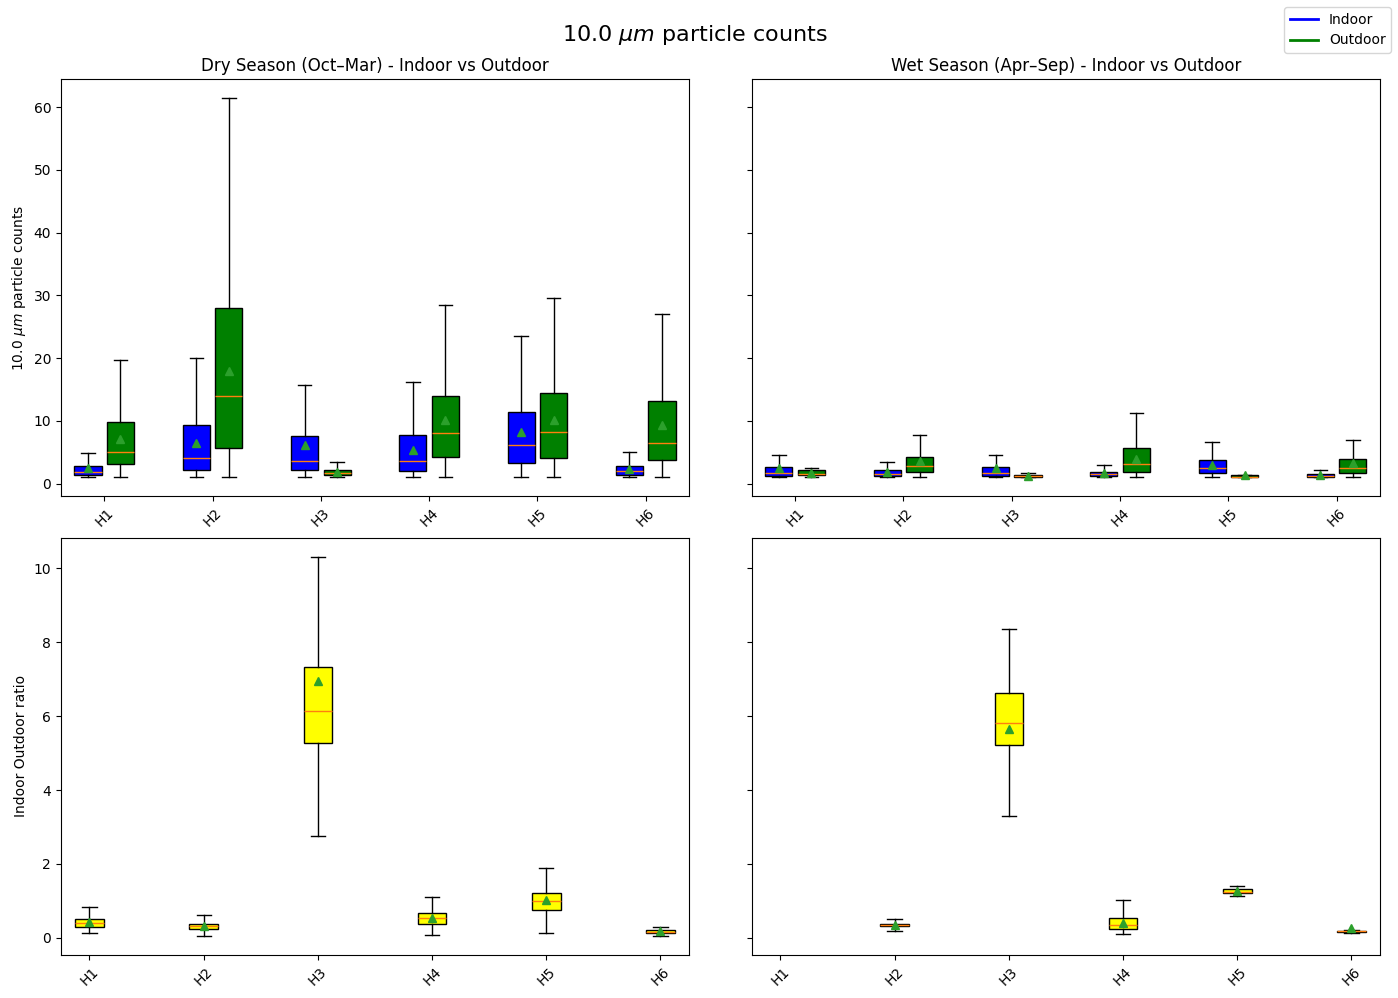

In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Config
DATA_DIR = "hourly_average"
# CURR_COL = "your_column_name"  # replace with your actual column name

def load_data(data_dir, curr_col):
    stations_data = {}
    for station in os.listdir(data_dir):
        station_path = os.path.join(data_dir, station)
        if not os.path.isdir(station_path):
            continue

        dfs = {}
        for file in ["Indoor.csv", "Outdoor.csv"]:
            file_path = os.path.join(station_path, file)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, parse_dates=["time"])
                dfs[file.replace(".csv", "").lower()] = df[["time", curr_col]].copy()
        if "indoor" in dfs and "outdoor" in dfs:
            stations_data[station] = dfs
    return stations_data

def split_seasons(df):
    df["month"] = df["time"].dt.month
    dry = df[df["month"].isin([10, 11, 12, 1, 2, 3])]
    wet = df[df["month"].isin([4, 5, 6, 7, 8, 9])]
    return dry, wet

stations_data = load_data(DATA_DIR, CURR_COL)

# Prepare data
dry_indoor, dry_outdoor, wet_indoor, wet_outdoor = {}, {}, {}, {}
ratios_dry, ratios_wet = {}, {}

for station, dfs in stations_data.items():
    indoor_dry, indoor_wet = split_seasons(dfs["indoor"].copy())
    outdoor_dry, outdoor_wet = split_seasons(dfs["outdoor"].copy())

    dry_indoor[station] = indoor_dry[CURR_COL].dropna()
    dry_outdoor[station] = outdoor_dry[CURR_COL].dropna()
    wet_indoor[station] = indoor_wet[CURR_COL].dropna()
    wet_outdoor[station] = outdoor_wet[CURR_COL].dropna()

    dfs['indoor'].columns = ['time', 'incol']
    dfs['outdoor'].columns = ['time', 'outcol']

    dfs_merged = pd.merge(dfs['indoor'], dfs['outdoor'], on='time', how='inner').dropna()
    drym, wetm = split_seasons(dfs_merged.copy())

    
    # Ratios
    if not outdoor_dry.empty:
        ratios_dry[station] = (drym['incol'] / drym['outcol']).dropna()
    else:
        ratios_dry[station] = []
    if not outdoor_wet.empty:
        ratios_wet[station] = (wetm['incol'] / wetm['outcol']).dropna()
    else:
        ratios_wet[station] = []
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey='row')


# Dry season boxplot
positions = []
labels = []
data = []
colors = []
for i, station in enumerate(dry_indoor.keys()):
    positions.extend([i * 2, i * 2 + 0.6])
    labels.append(station)
    data.extend([dry_indoor[station], dry_outdoor[station]])
    colors.extend(["blue", "green"])

bplot = axes[0, 0].boxplot(data, positions=positions, widths=0.5, patch_artist=True, showfliers=False, showmeans=True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 0].set_title("Dry Season (Oct–Mar) - Indoor vs Outdoor")
axes[0, 0].set_xticks([i * 2 + 0.3 for i in range(len(labels))])
axes[0, 0].set_xticklabels(labels, rotation=45)
axes[0, 0].set_ylabel(f"{VAR_LATEX} {VAR_UNIT}")

# Wet season boxplot
positions, labels, data, colors = [], [], [], []
for i, station in enumerate(wet_indoor.keys()):
    positions.extend([i * 2, i * 2 + 0.6])
    labels.append(station)
    data.extend([wet_indoor[station], wet_outdoor[station]])
    colors.extend(["blue", "green"])

bplot = axes[0, 1].boxplot(data, positions=positions, widths=0.5, patch_artist=True, showfliers=False, showmeans=True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 1].set_title("Wet Season (Apr–Sep) - Indoor vs Outdoor")
axes[0, 1].set_xticks([i * 2 + 0.3 for i in range(len(labels))])
axes[0, 1].set_xticklabels(labels, rotation=45)

# Ratios dry
positions, labels, data, colors = [], [], [], []
for i, station in enumerate(wet_indoor.keys()):
    positions.extend([i * 2 + 0.3])
    labels.append(station)
    data.extend([ratios_dry[station]])
    colors.extend(["yellow"])

bplot = axes[1, 0].boxplot(data, positions=positions, widths=0.5, patch_artist=True, showfliers=False, showmeans=True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 0].set_ylabel("Indoor Outdoor ratio")
axes[1, 0].set_xticklabels(labels, rotation=45)


# Ratios wet
positions, labels, data, colors = [], [], [], []
for i, station in enumerate(wet_indoor.keys()):
    positions.extend([i * 2 + 0.3])
    labels.append(station)
    data.extend([ratios_wet[station]])
    colors.extend(["yellow"])
axes[1, 1].set_xticklabels(labels, rotation=45)

bplot = axes[1, 1].boxplot(data, positions=positions, widths=0.5, patch_artist=True, showfliers=False, showmeans=True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.suptitle(f"{VAR_LATEX}", fontsize = 16)

indoor = mlines.Line2D([], [], color="blue", linewidth=2, label="Indoor")
outdoor = mlines.Line2D([], [], color="green", linewidth=2, label="Outdoor")
import matplotlib.lines as mlines

# Add this line after the existing mlines definitions
plt.figlegend([indoor, outdoor], ['Indoor', 'Outdoor'], loc="upper right", ncol=1)


plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()


  0%|          | 0/6 [00:00<?, ?it/s]

Processing H1
Processing H2
Processing H3
Processing H4
Processing H5
Processing H6


C:\Users\Dipankar Mitra\AppData\Local\Temp\ipykernel_2804\3058437613.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ind_plot = plt.boxplot(inboxPlotArray, labels=inboxPlotLabel,  showfliers=False, positions=[1, 1.8, 3, 3.8, 5, 5.8, 7, 7.8, 9, 9.8, 11, 11.8], showmeans=True, patch_artist=True, meanprops=dict(markerfacecolor='yellow', markeredgecolor='red'))
C:\Users\Dipankar Mitra\AppData\Local\Temp\ipykernel_2804\3058437613.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  outd_plot = plt.boxplot(outboxPlotArray, labels=outboxPlotLabel,  showfliers=False, positions=[1, 1.8, 3, 3.8, 5, 5.8, 7, 7.8, 9, 9.8, 11, 11.8], showmeans=True, patch_artist=True, meanprops=dict(markerfacecolor='yellow', markeredgecolor='red'))


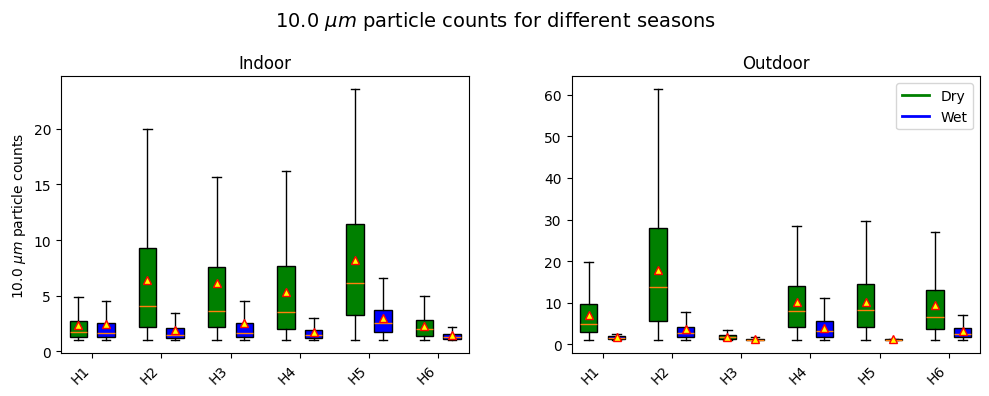

In [72]:
inboxPlotArray = []
inboxPlotLabel = []

outboxPlotArray = []
outboxPlotLabel = []

dir = 'hourly_average'
# subdirs = [f for f in os.listdir(dir) if os.path.isdir(os.path.join(dir, f)) ]
subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
for subdir in tqdm(subdirs):
    print(f'Processing {subdir}')
    files = ['Indoor.csv', 'Outdoor.csv']
    for file in files:
        dry = []
        wet = []
        if "tdoor" in file:
            type = 'Outdoor'
        elif "ndoor" in file:
            type = 'Indoor'
        else:
            warnings.warn("type not detected", UserWarning)
        # Load the DataFrame from CSV
        file_path = os.path.join(dir, subdir, file)  # Replace with your actual file path
        df = pd.read_csv(file_path)

        # Ensure the 'time' column is in datetime format
        df['time'] = pd.to_datetime(df['time'])

        # Define dry season (November to April) and wet season (May to October)
        dry_season = df[df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])]
        wet_season = df[df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])]
        
        
        dry.append(dry_season[CURR_COL].dropna().to_numpy())
        wet.append(wet_season[CURR_COL].dropna().to_numpy())

        dry = np.concatenate(dry)
        wet = np.concatenate(wet)

        if type == "Indoor":
            inboxPlotArray.append(dry)
            inboxPlotArray.append(wet)

            inboxPlotLabel.append(f'Dry_{subdir}')
            inboxPlotLabel.append(f'Wet_{subdir}')

        elif type == "Outdoor":
            outboxPlotArray.append(dry)
            outboxPlotArray.append(wet)

            outboxPlotLabel.append(f'Dry_{subdir}')
            outboxPlotLabel.append(f'Wet_{subdir}')
        
colors = ['green', 'blue'] * 6

# Create a boxplot for the four categories
plt.figure(figsize=(10, 4))
plt.subplots_adjust( wspace=0.3)  
plt.subplot(1, 2, 1)
ind_plot = plt.boxplot(inboxPlotArray, labels=inboxPlotLabel,  showfliers=False, positions=[1, 1.8, 3, 3.8, 5, 5.8, 7, 7.8, 9, 9.8, 11, 11.8], showmeans=True, patch_artist=True, meanprops=dict(markerfacecolor='yellow', markeredgecolor='red'))
for patch, color in zip(ind_plot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1.4, 3.4, 5.4, 7.4, 9.4, 11.4], labels=[x.split(' ')[0].split('_')[1] for x in inboxPlotLabel[0::2]], rotation = 45, ha = 'right')
# set_box_outline_colors(ind_plot, colors)
plt.title("Indoor", fontsize = 12)
plt.ylabel(f'{VAR_LATEX} {VAR_UNIT}')
# plt.grid(True, axis='y')

dry = mlines.Line2D([], [], color="blue", linewidth=2, label="Dry")
wet = mlines.Line2D([], [], color="green", linewidth=2, label="Wet")


# legend2 = plt.legend(handles=[dry, wet],
#                       ncols = 1)

# Create a boxplot for the four categories
plt.subplot(1, 2, 2)
outd_plot = plt.boxplot(outboxPlotArray, labels=outboxPlotLabel,  showfliers=False, positions=[1, 1.8, 3, 3.8, 5, 5.8, 7, 7.8, 9, 9.8, 11, 11.8], showmeans=True, patch_artist=True, meanprops=dict(markerfacecolor='yellow', markeredgecolor='red'))
# set_box_outline_colors(outd_plot, colors)
for patch, color in zip(outd_plot['boxes'], colors):
    patch.set_facecolor(color)
plt.title("Outdoor", fontsize = 12)
plt.xticks([1.4, 3.4, 5.4, 7.4, 9.4, 11.4], labels=[x.split(' ')[0].split('_')[1] for x in outboxPlotLabel[0::2]], rotation = 45, ha = 'right')

# plt.grid(True, axis='y')
plt.suptitle(f'{VAR_LATEX} for different seasons', fontsize = 14)

dry = mlines.Line2D([], [], color="green", linewidth=2, label="Dry")
wet = mlines.Line2D([], [], color="blue", linewidth=2, label="Wet")


legend2 = plt.legend(handles=[dry, wet],
                      ncols = 1)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
#plt.savefig('graphs/box plots/conc indoor outdoor.png', dpi = 300)
plt.show()



#### Diurnals

processing H1


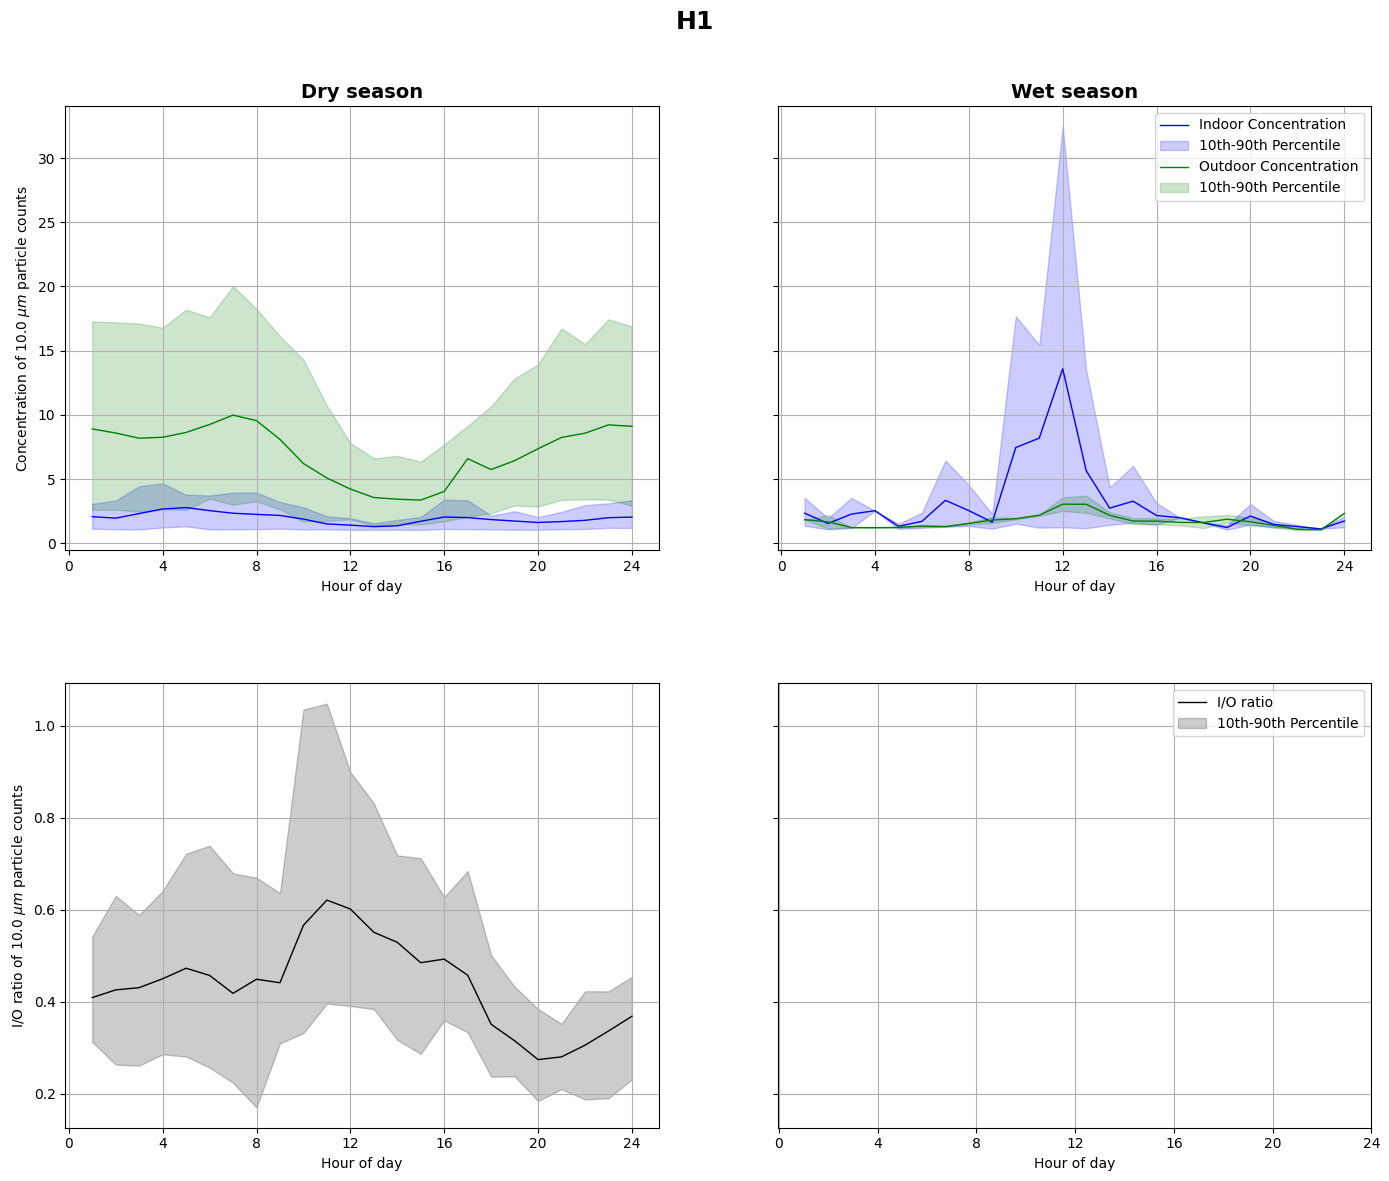

processing H2


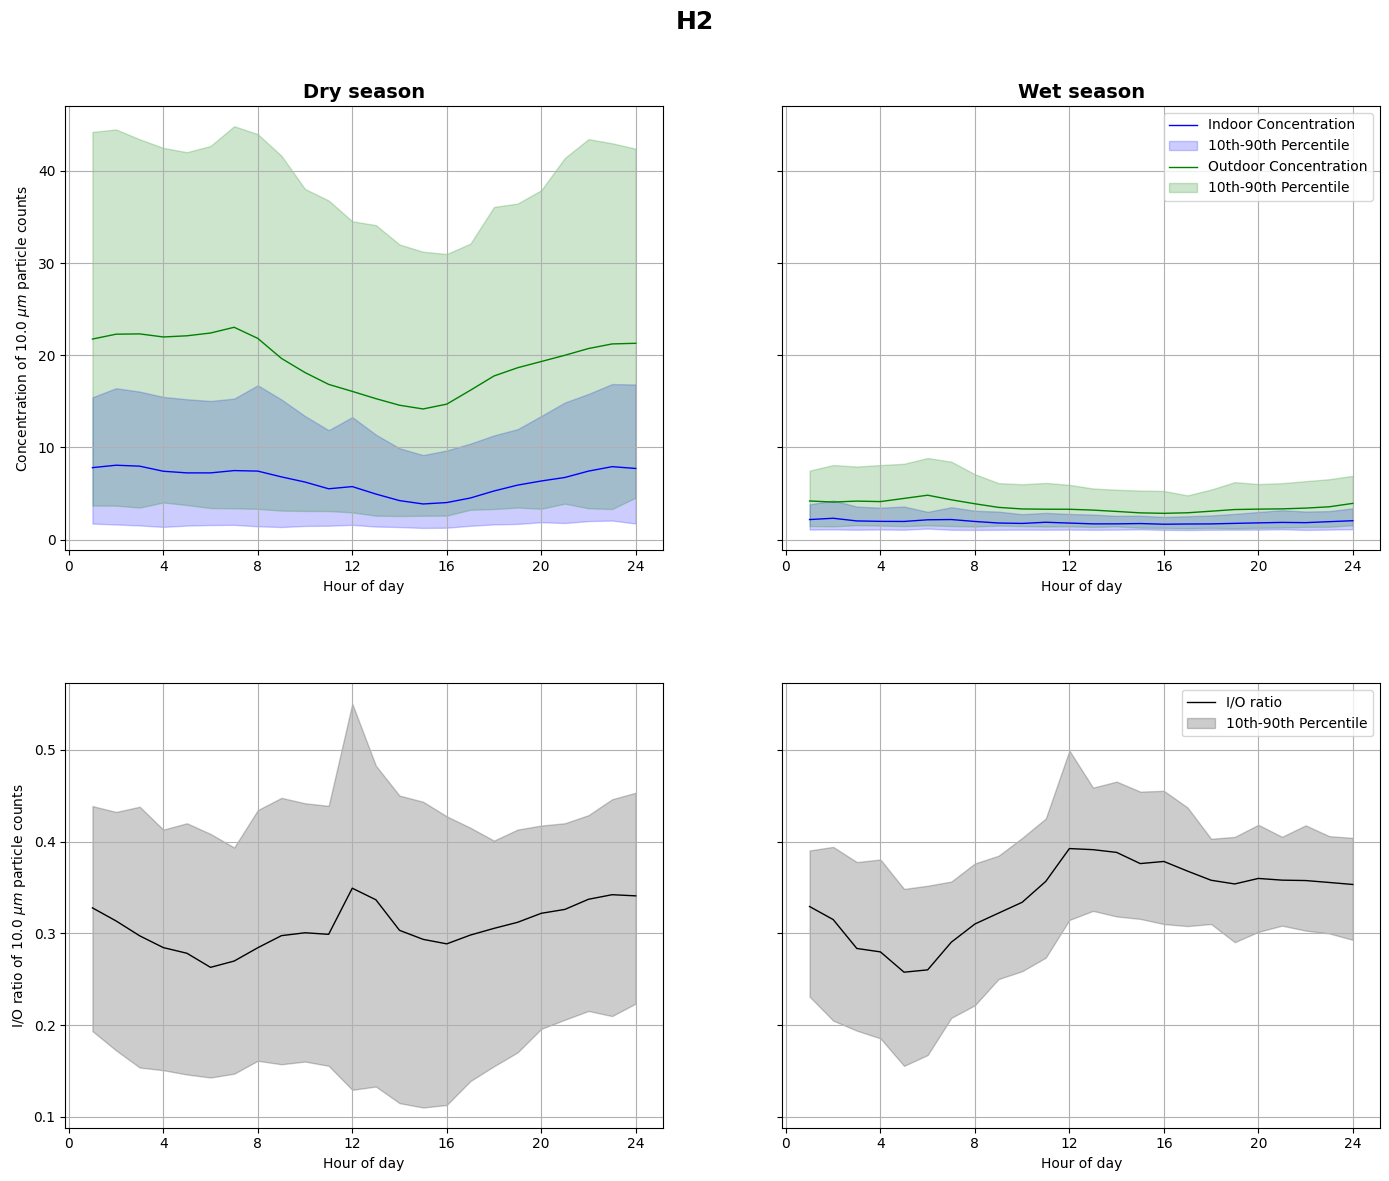

processing H3


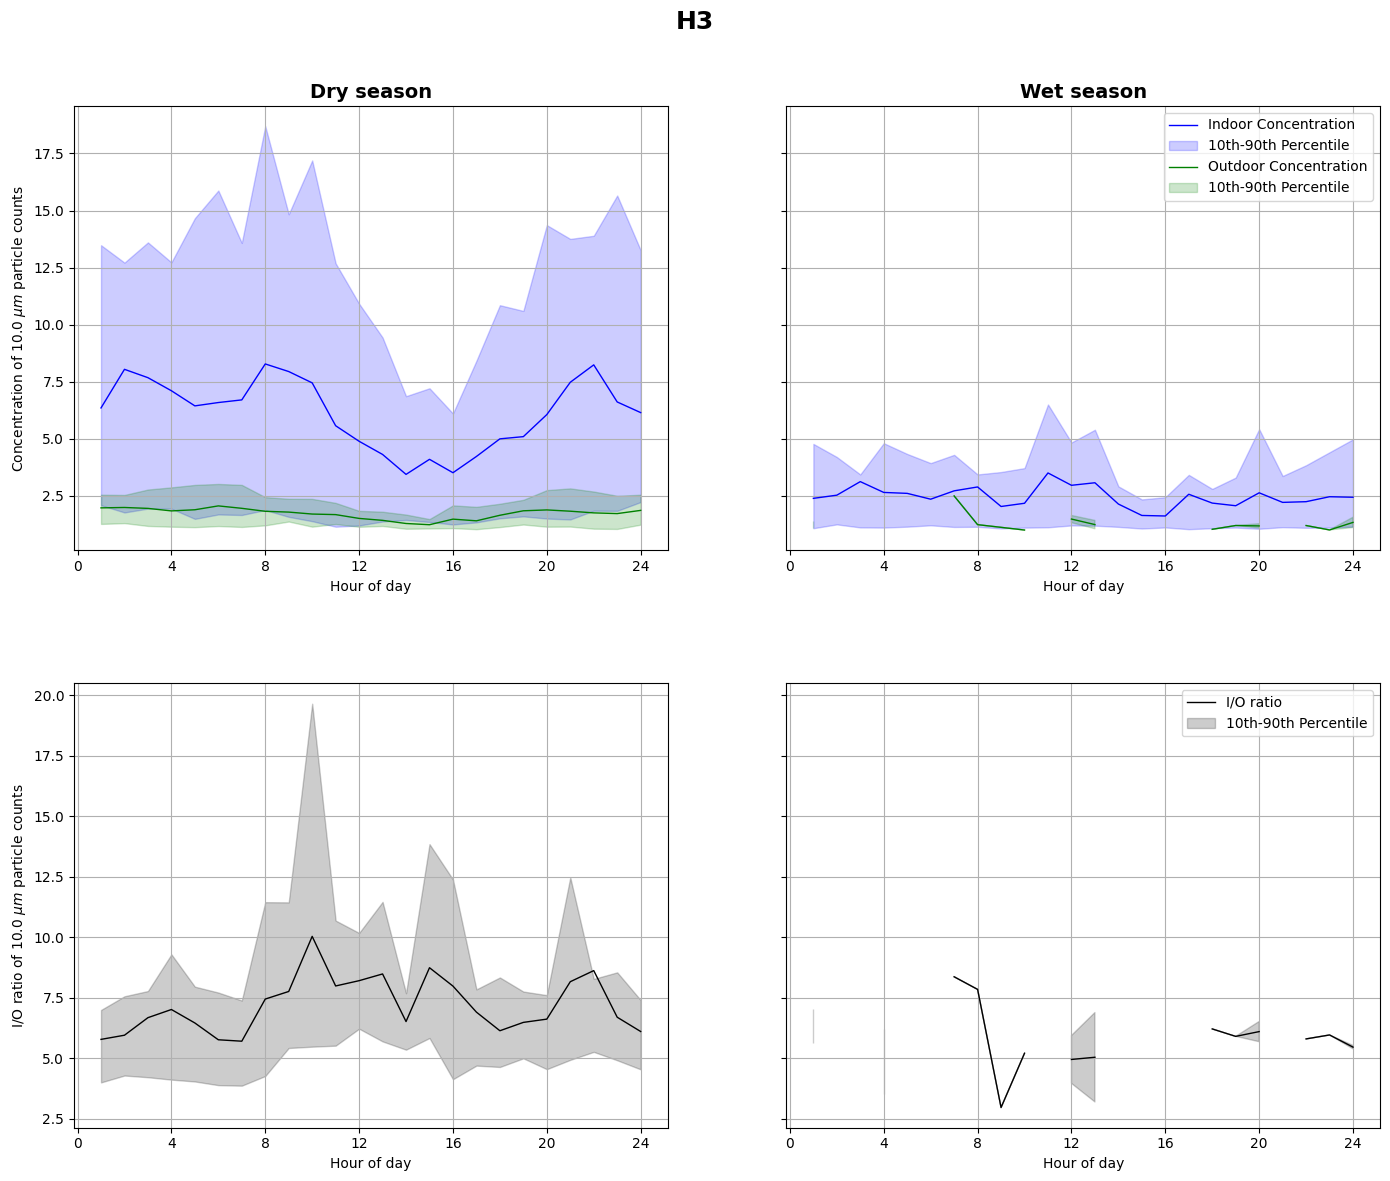

processing H4


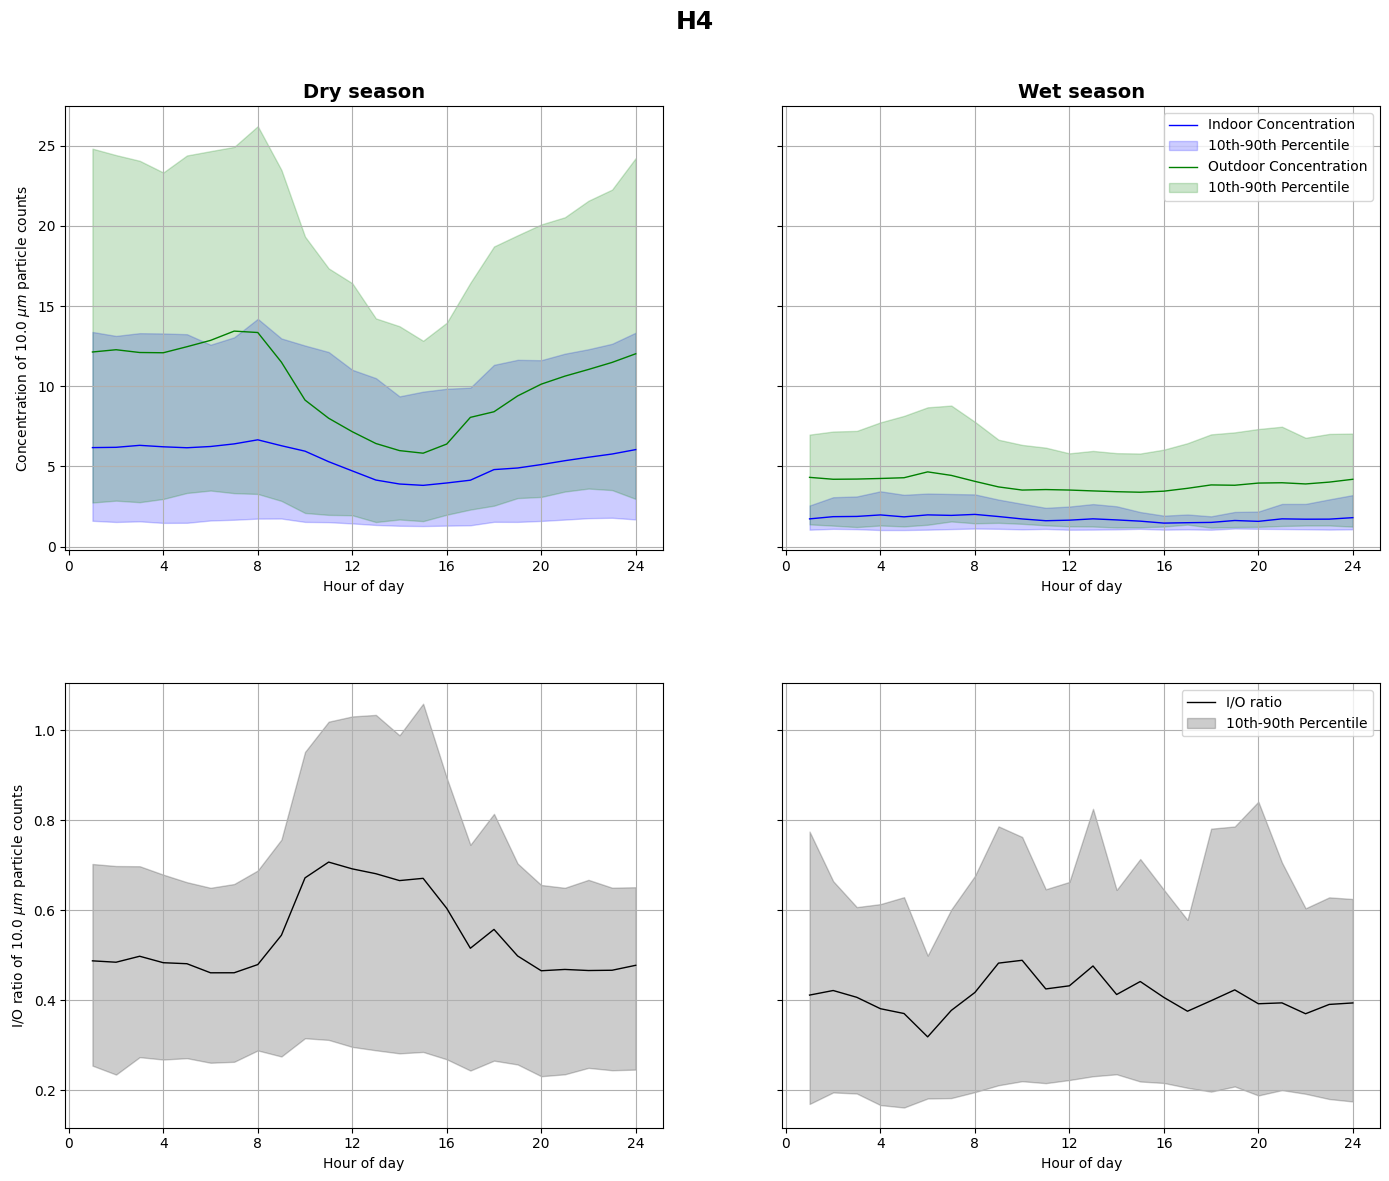

processing H5


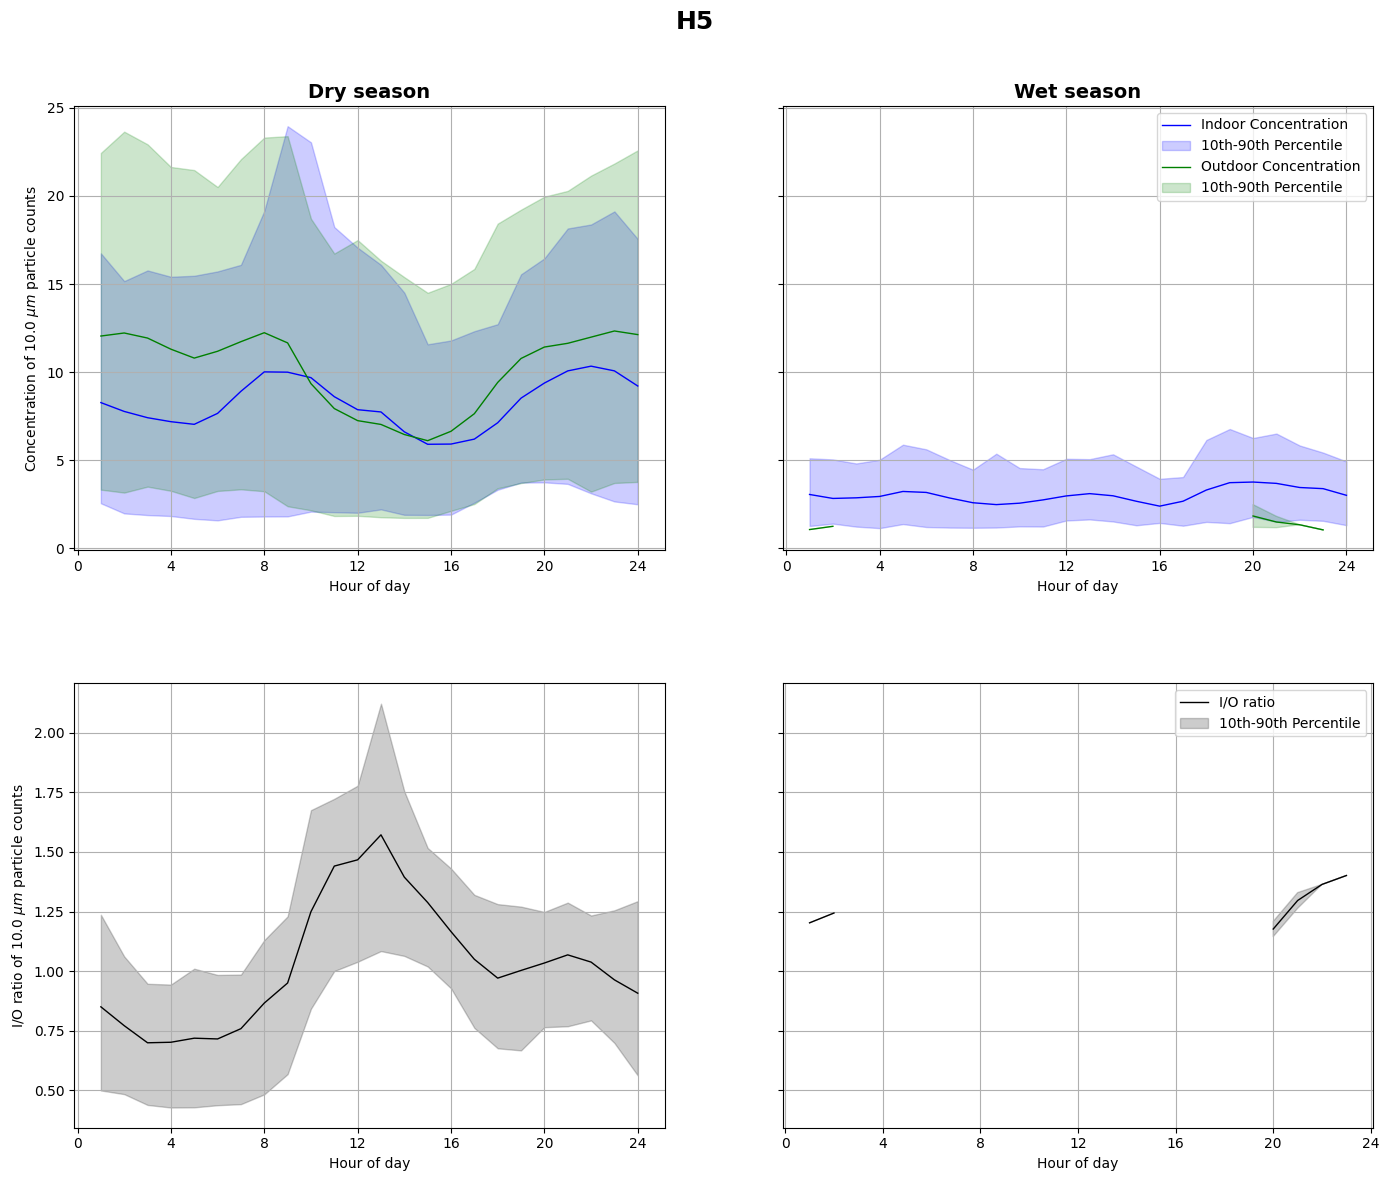

processing H6


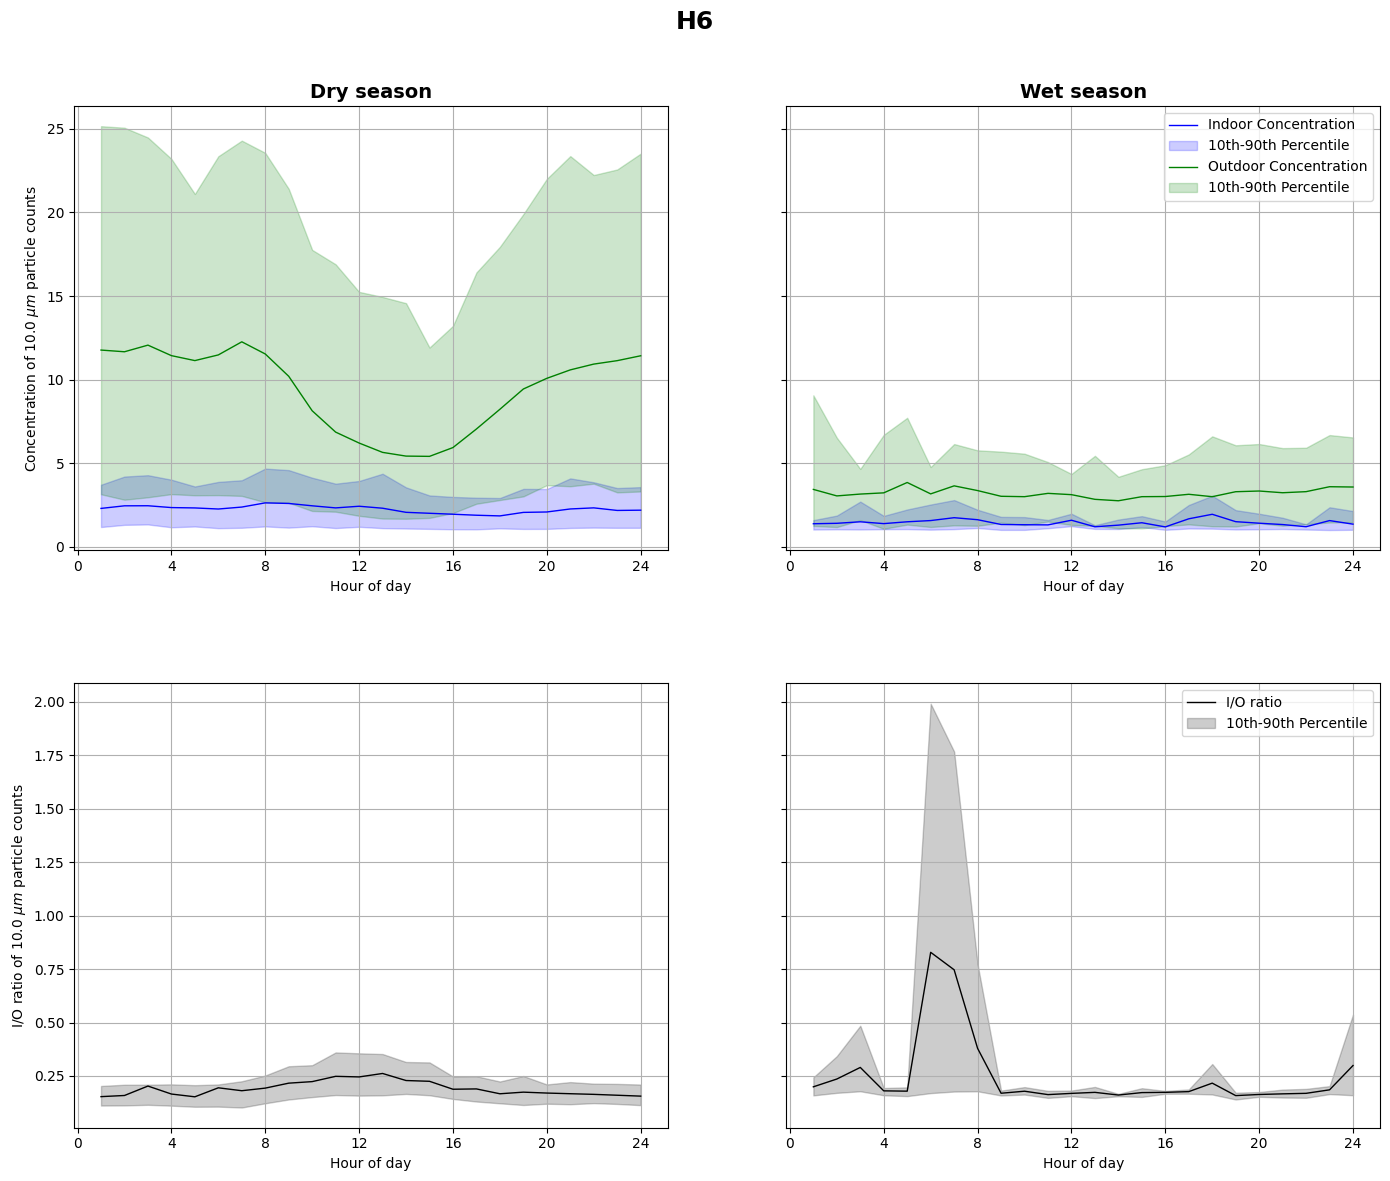

In [73]:
## I/O Time dinural (full)
## plotting

dir = 'hourly_average'
savedir = 'graphs/dinural variations/inout overlap'

# subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) if "Home" in d]
subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
# subdirs = ['Dhakeshwari Home']


for home in subdirs:
    print(f"processing {home}")
    indoor_df = pd.read_csv(f'hourly_average/{home}/Indoor.csv')
    indoor_df['time'] = pd.to_datetime(indoor_df['time'])
    indoor_df = indoor_df[['time', CURR_COL]]
    indoor_df.columns = ['time', 'pm2_5_indoor']

    outdoor_df = pd.read_csv(f'hourly_average/{home}/Outdoor.csv')
    outdoor_df['time'] = pd.to_datetime(outdoor_df['time'])
    outdoor_df = outdoor_df[['time', CURR_COL]]
    outdoor_df.columns = ['time', 'pm2_5_outdoor']

    combined_df = pd.merge(indoor_df, outdoor_df, how='inner', on='time')
    combined_df['IO_ratio'] = combined_df['pm2_5_indoor'] / combined_df['pm2_5_outdoor']
    combined_df['IO_ratio'] = combined_df['IO_ratio'].apply(lambda x : x if (x>0) else float('nan'))
    combined_df['hour'] = combined_df['time'].dt.hour  # Extract hour from time
    combined_df['hour'] = combined_df['hour'].apply(lambda x : x if x!=0 else 24)

    wet_df_combined = combined_df[combined_df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])]
    dry_df_combined = combined_df[combined_df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])]
    # Group by hour and calculate mean IO_ratio
    targets = [
        (
            'pm2_5_indoor', 
            in_color, 
            (0, 45000), 
            f"Concentration of {VAR_LATEX} {VAR_UNIT}",
            "Indoor Concentration",
            'Concentrations'
        ), 
        (
            'pm2_5_outdoor', 
            out_color, 
            (0, 45000), 
            f"Concentration of {VAR_LATEX} {VAR_UNIT}",
            "Outdoor Concentration",
            "Concentrations"
        ), 
        (
            'IO_ratio', 
            ratio_color, 
            (0, 3), 
            f"I/O ratio of {VAR_LATEX}",
            "I/O ratio",
            "Indoor/Outdoor ratio"
        )  
    ]


    fig, axes = plt.subplots(2, 2, figsize=(14, 12), gridspec_kw={'width_ratios': [50, 50]}, sharey='row')
    i = 0
    for target, color, ylim, ylabel, legend, item in targets:
        dinural_dry = dry_df_combined.groupby('hour')[target].agg(
                                                                            mean='mean',
                                                                            Q10=lambda x: x.quantile(.10),
                                                                            Q90=lambda x: x.quantile(0.9)
                                                                        ).reset_index()
        dinural_wet = wet_df_combined.groupby('hour')[target].agg(
                                                                            mean='mean',
                                                                            Q10=lambda x: x.quantile(0.1),
                                                                            Q90=lambda x: x.quantile(0.9)
                                                                        ).reset_index()
        if home in ["Dania Home", "Badda Home"]:
            dinural_wet['mean'] = np.nan
            dinural_wet['Q10'] = np.nan
            dinural_wet['Q90'] = np.nan
        j = 0
        for df, name  in [(dinural_dry, 'Dry'), (dinural_wet, 'Wet')]:
            if i > 0:
                ax = axes[i-1, j]
            else:
                ax = axes[i, j]

            # Plot the PM2.5 concentrations
            ax.plot(df['hour'], df['mean'], label=legend, color=color, linestyle='-', markersize=3, linewidth = 1)
            ax.fill_between(df['hour'], df['Q10'], df['Q90'], 
                    color=color, alpha=0.2, label='10th-90th Percentile')
            
            # Labels and title
            ax.set_xlabel('Hour of day')
            if j == 0:
                ax.set_ylabel(ylabel)
            if i == 0:
                ax.set_title(f'{name} season', fontsize = 14, fontweight = 'bold')
            if j == 1:
                ax.legend()
            ax.grid(True)
            # ax.set_xticklabels(ax.get_xticks(), rotation=45) 
            # ax.set_ylim(ylim)
            ax.set_xticks(range(0, 25, 4))
            j += 1
        i += 1


    plt.suptitle(f'{home.split(' ')[0]}', fontsize = 18, fontweight = 'bold')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.3)     
    plt.subplots_adjust(top=0.9)

    plt.savefig(f"graphs/{VAR_NAME}/diurnals/{home.split(' ')[0]}.png", dpi = 300)
    plt.show()


Processed H1
Processed H2
Processed H3
Processed H4
Processed H5
Processed H6


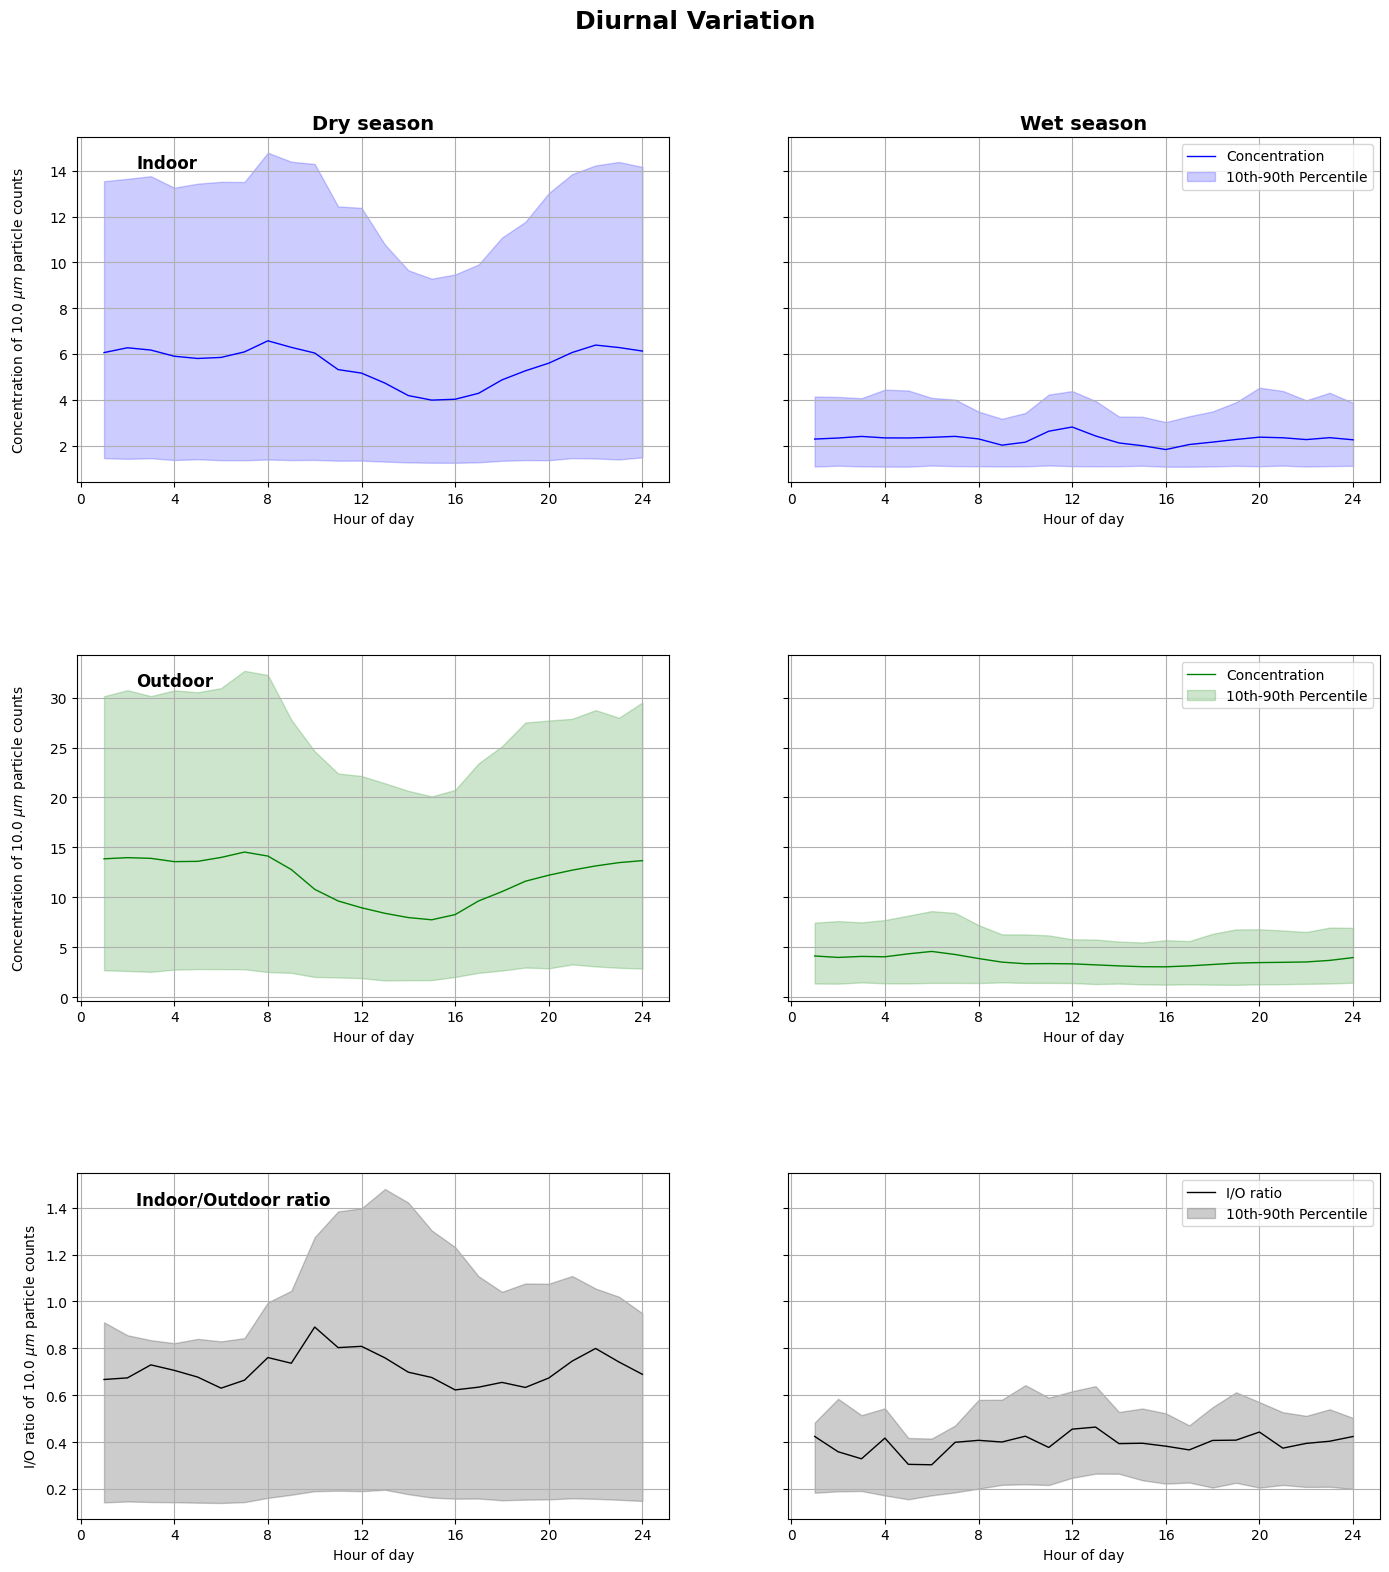

In [74]:
## I/O Time dinural (full)
## plotting

dir = 'hourly_average'
savedir = 'graphs/dinural variations'
# subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) if "Home" in d]
subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
indoor_dfs = []
outdoor_dfs = []
combined_dfs = []


for home in subdirs:
    indoor_df = pd.read_csv(f'hourly_average/{home}/Indoor.csv')
    indoor_df['time'] = pd.to_datetime(indoor_df['time'])
    indoor_df = indoor_df[['time', CURR_COL]]
    indoor_df.columns = ['time', 'pm2_5_indoor']
    indoor_dfs.append(indoor_df)

    outdoor_df = pd.read_csv(f'hourly_average/{home}/Outdoor.csv')
    outdoor_df['time'] = pd.to_datetime(outdoor_df['time'])
    outdoor_df = outdoor_df[['time', CURR_COL]]
    outdoor_df.columns = ['time', 'pm2_5_outdoor']
    outdoor_dfs.append(outdoor_df)

    combined_df = pd.merge(indoor_df, outdoor_df, how='inner', on='time')
    combined_df['IO_ratio'] = combined_df['pm2_5_indoor'] / combined_df['pm2_5_outdoor']
    combined_df['IO_ratio'] = combined_df['IO_ratio'].apply(lambda x : x if (x>0) else float('nan'))
    combined_df['hour'] = combined_df['time'].dt.hour  # Extract hour from time
    combined_df['hour'] = combined_df['hour'].apply(lambda x : x if x!=0 else 24)
    if home in ["Dania Home", "Badda Home"]:
        combined_df = combined_df[combined_df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])].copy()
    combined_dfs.append(combined_df)
    print(f"Processed {home}")

combined_df = pd.concat(combined_dfs)

wet_df_combined = combined_df[combined_df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])]
dry_df_combined = combined_df[combined_df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])]
# Group by hour and calculate mean IO_ratio
targets = [
    (
        'pm2_5_indoor', 
        in_color, 
        (0, 300), 
        f"Concentration of {VAR_LATEX}" + "\n" + f"{VAR_UNIT}",
        "Concentration",
        'Indoor'
    ), 
    (
        'pm2_5_outdoor', 
        out_color, 
        (0, 300), 
        f"Concentration of {VAR_LATEX}" + "\n" + f"{VAR_UNIT}",
        "Concentration",
        "Outdoor"
    ), 
    (
        'IO_ratio', 
        ratio_color, 
        (0, 2), 
        f"I/O ratio of {VAR_LATEX}",
        "I/O ratio",
        "Indoor/Outdoor ratio"
    )  
]

home = "Full Data"
fig, axes = plt.subplots(3, 2, figsize=(14, 16), gridspec_kw={'width_ratios': [50, 50]}, sharey='row')
i = 0
for target, color, ylim, ylabel, legend, item in targets:
    dinural_dry = dry_df_combined.groupby('hour')[target].agg(
                                                                        mean='mean',
                                                                        Q10=lambda x: x.quantile(.10),
                                                                        Q90=lambda x: x.quantile(0.9)
                                                                    ).reset_index()
    dinural_wet = wet_df_combined.groupby('hour')[target].agg(
                                                                        mean='mean',
                                                                        Q10=lambda x: x.quantile(0.1),
                                                                        Q90=lambda x: x.quantile(0.9)
                                                                    ).reset_index()

    j = 0
    for df, name  in [(dinural_dry, 'Dry'), (dinural_wet, 'Wet')]:
        ax = axes[i, j]

        # Plot the PM2.5 concentrations
        ax.plot(df['hour'], df['mean'], label=legend, color=color, linestyle='-', markersize=3, linewidth = 1)
        ax.fill_between(df['hour'], df['Q10'], df['Q90'], 
                color=color, alpha=0.2, label='10th-90th Percentile')
        
        # Labels and title
        ax.set_xlabel('Hour of day')
        if j == 0:
            ax.set_ylabel(ylabel)
        if i == 0:
            ax.set_title(f'{name} season', fontsize = 14, fontweight = 'bold')
        if j == 1:
            ax.legend()
        ax.grid(True)
        ax.set_xticks(range(0, 25, 4))
        # ax.set_xticklabels(ax.get_xticks(), rotation=45) 
        # ax.set_ylim(ylim)
        if j == 0: ax.text(0.1, 0.95, item, fontsize = 12, fontweight = "bold", transform=ax.transAxes, verticalalignment='top')
        j += 1
    i += 1


plt.suptitle(f'Diurnal Variation', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.5)     
plt.subplots_adjust(top=0.9)  # Adjust top spacing to move plots down

#plt.savefig(os.path.join(savedir, f'fullData.png'), dpi = 300)
plt.show()

#### Weekly daywise variation

processing H1


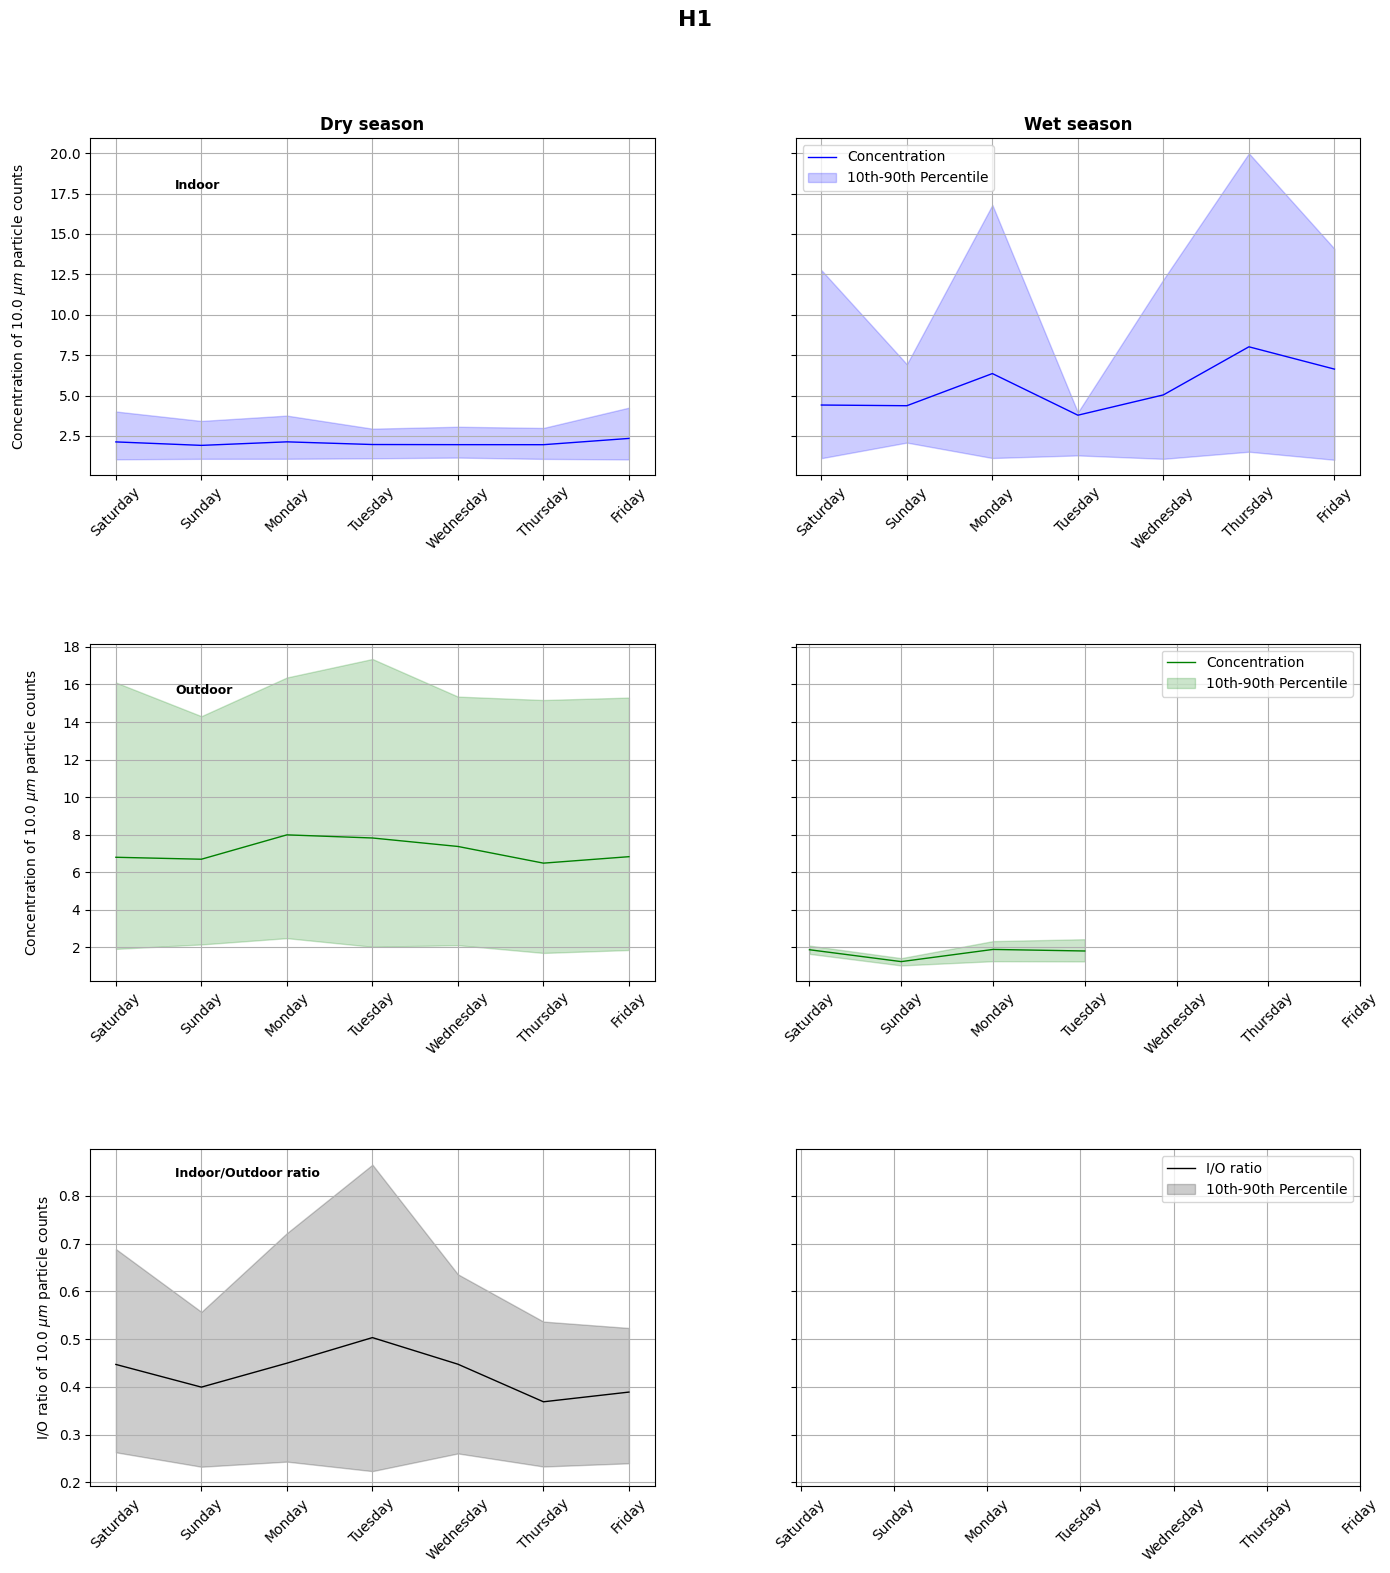

processing H2


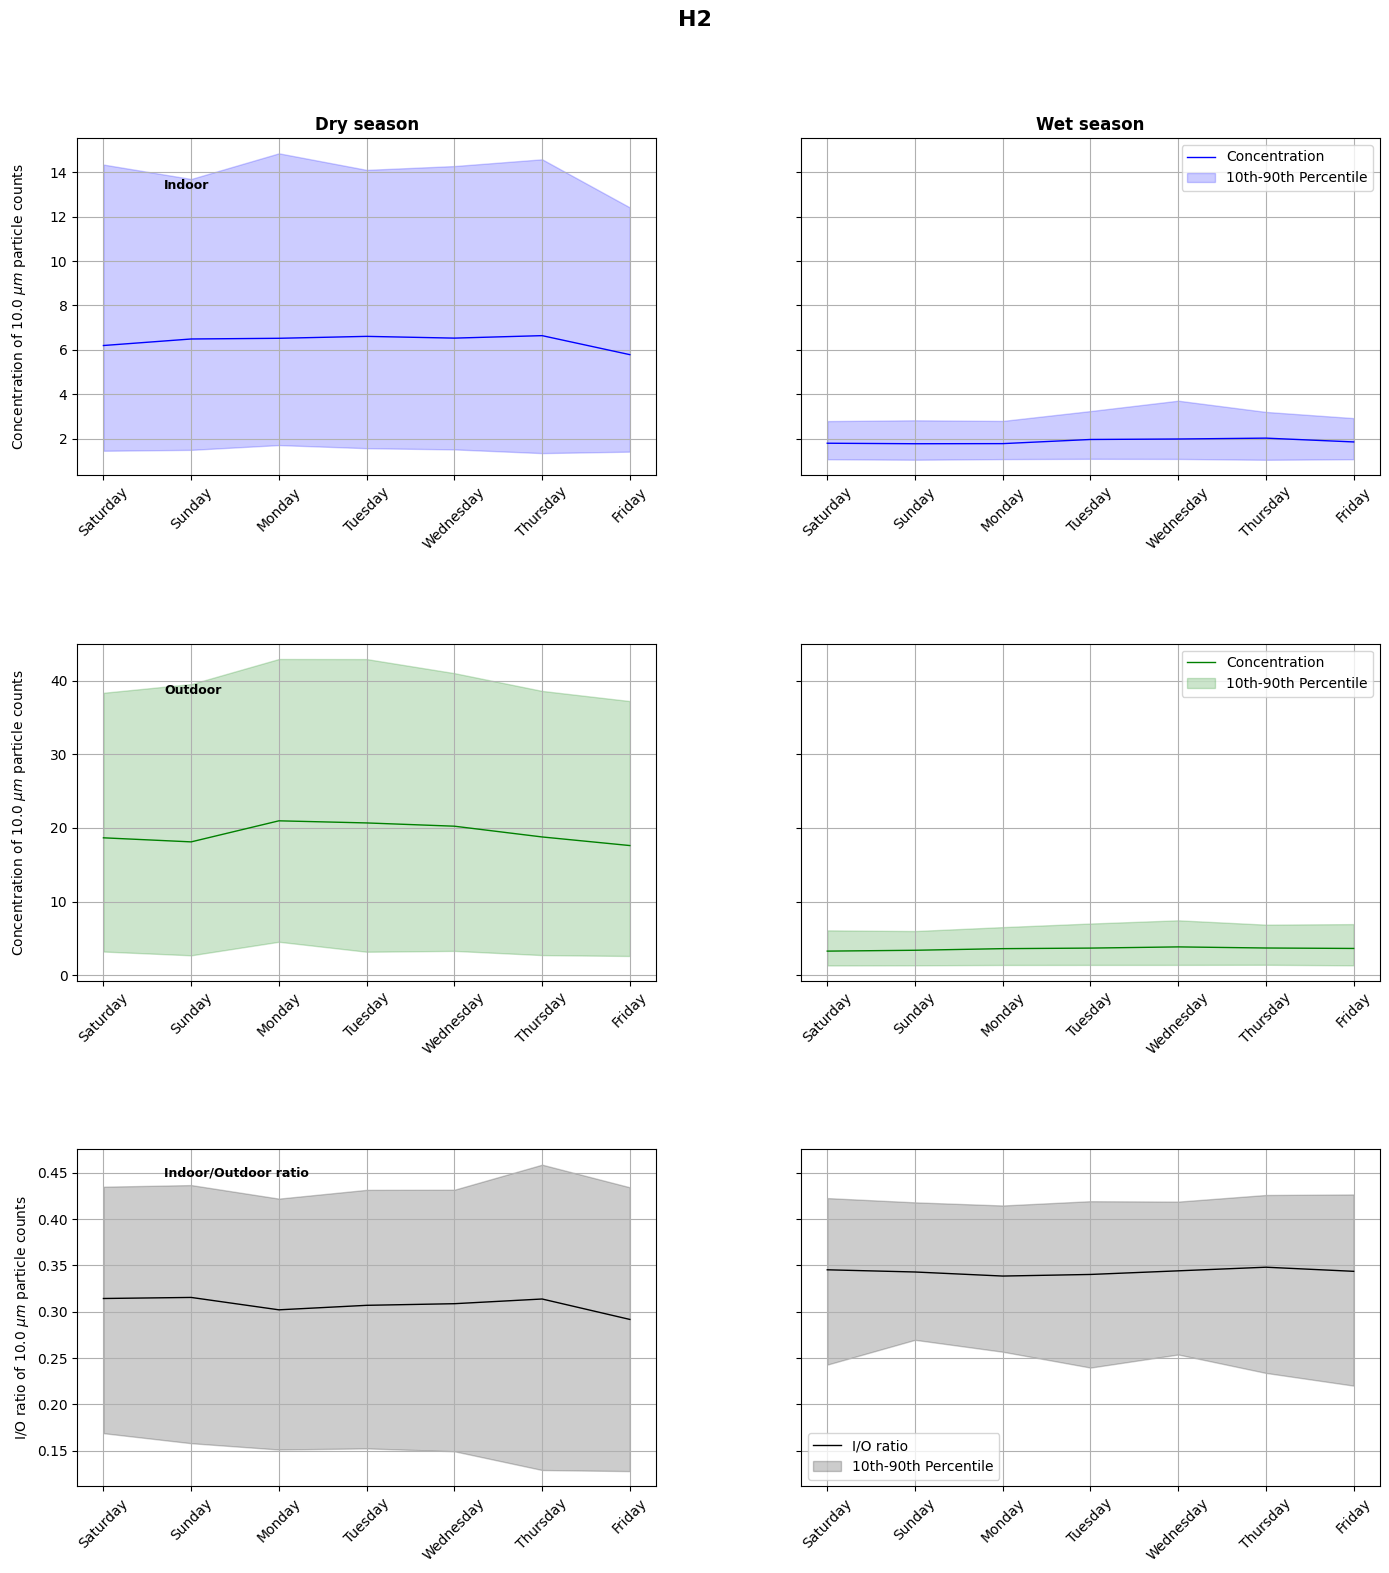

processing H3


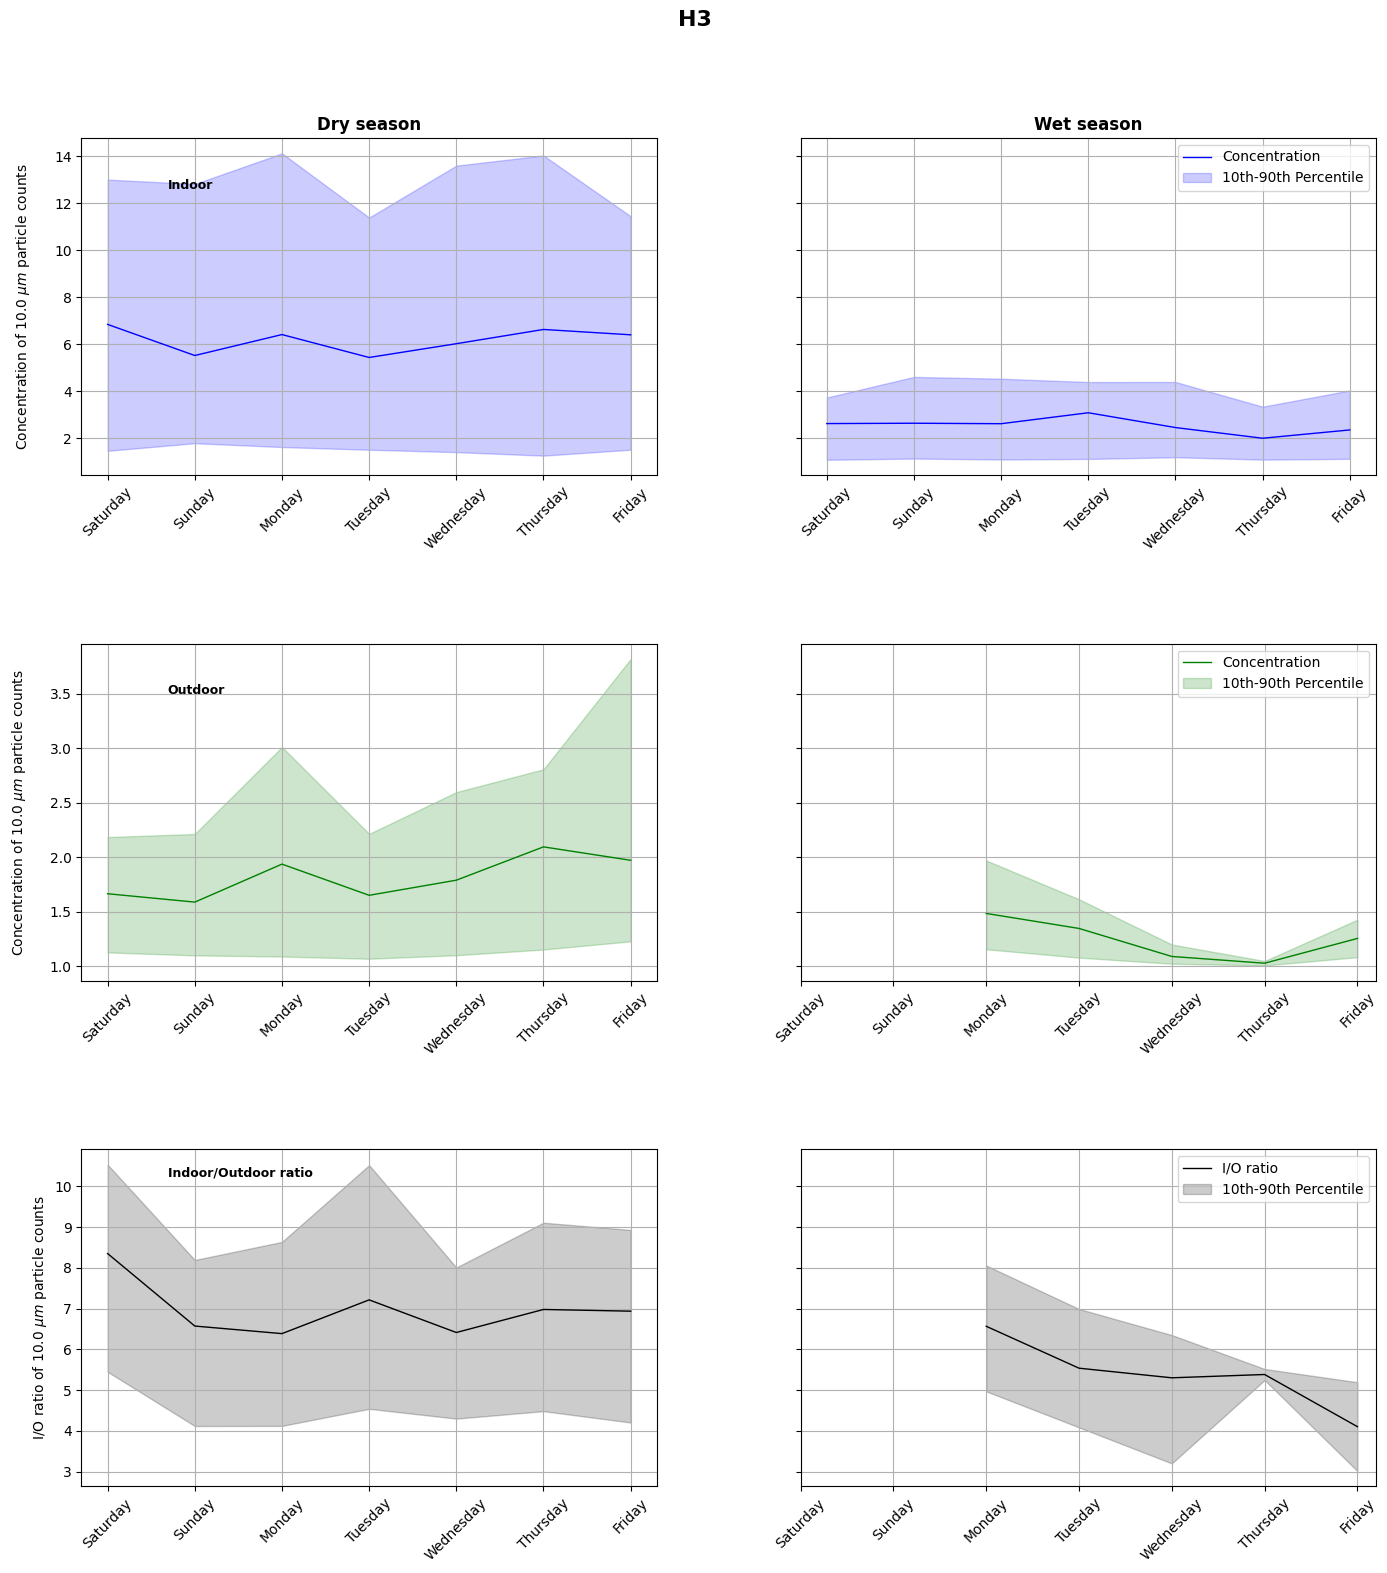

processing H4


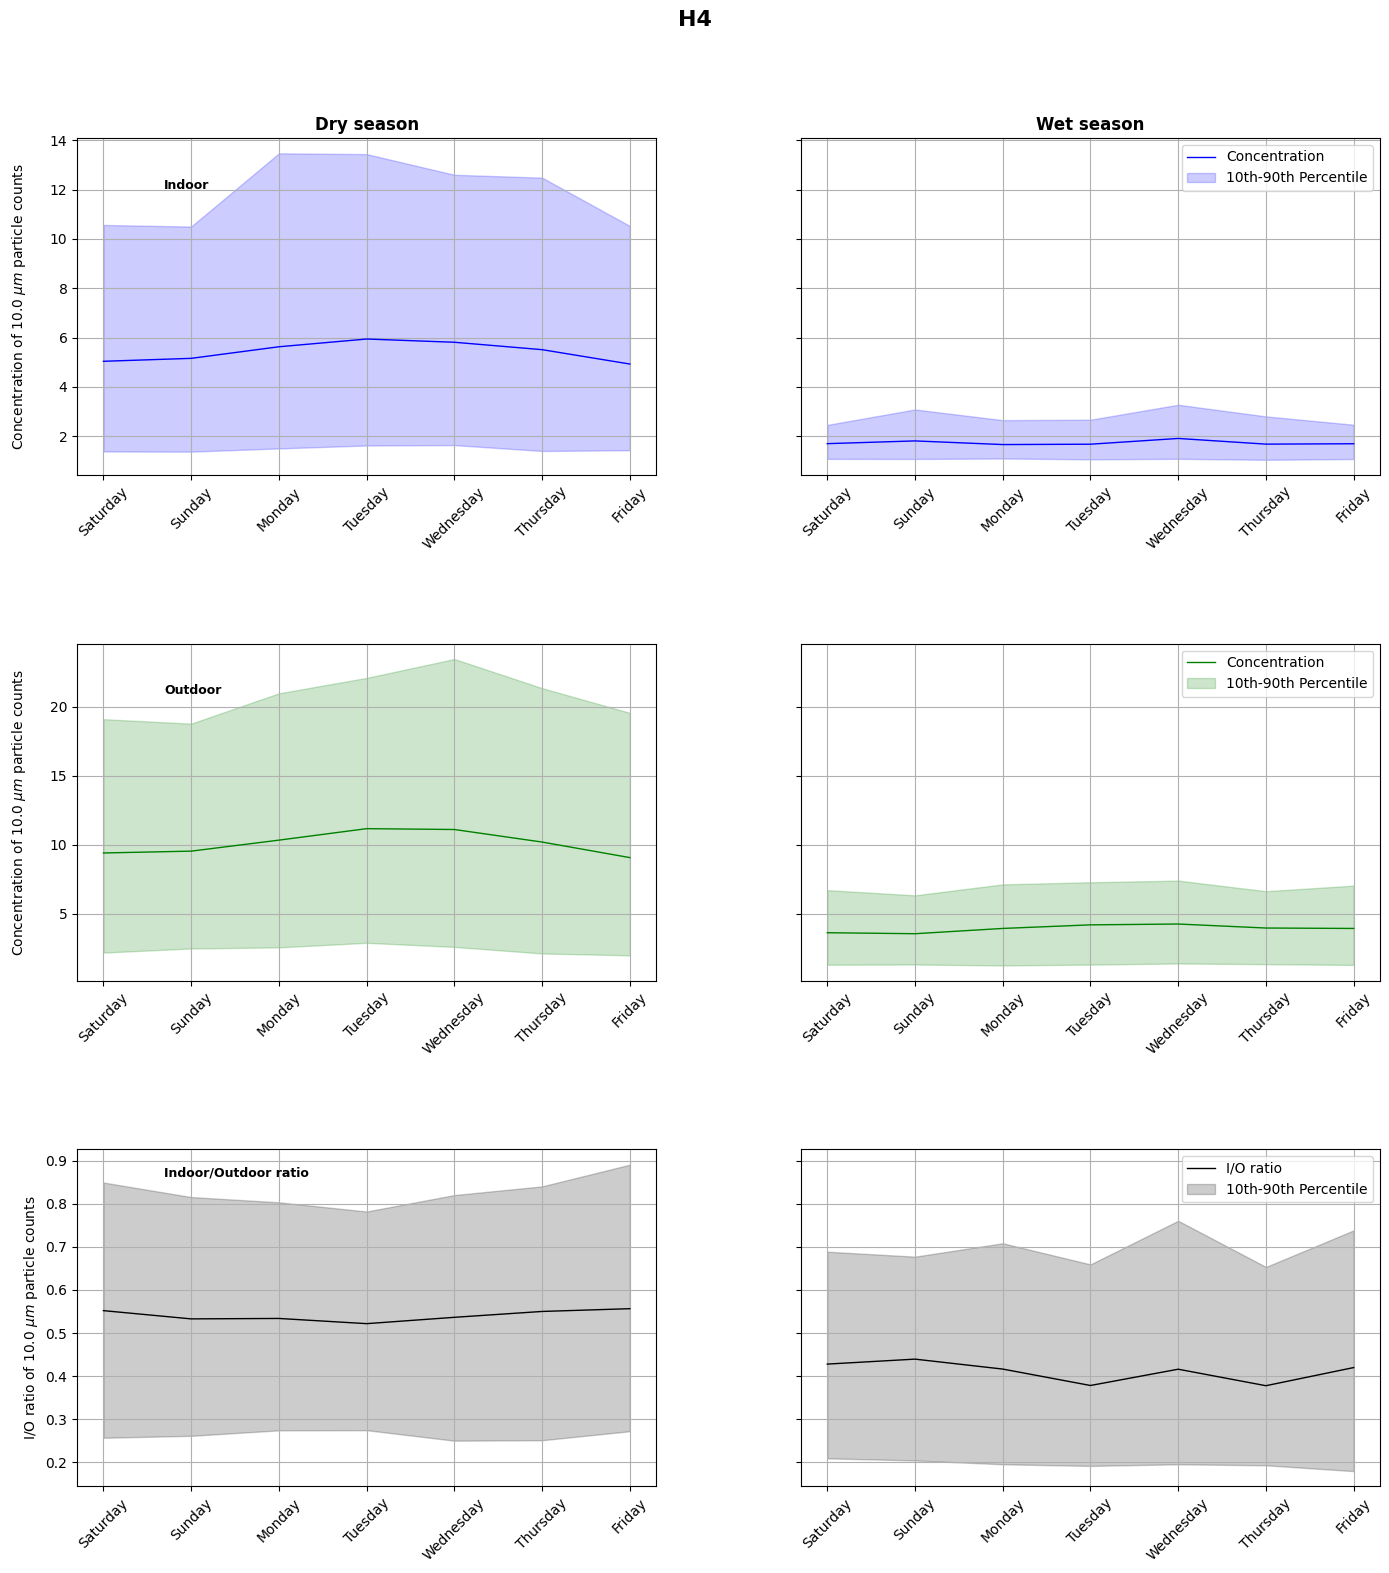

processing H5


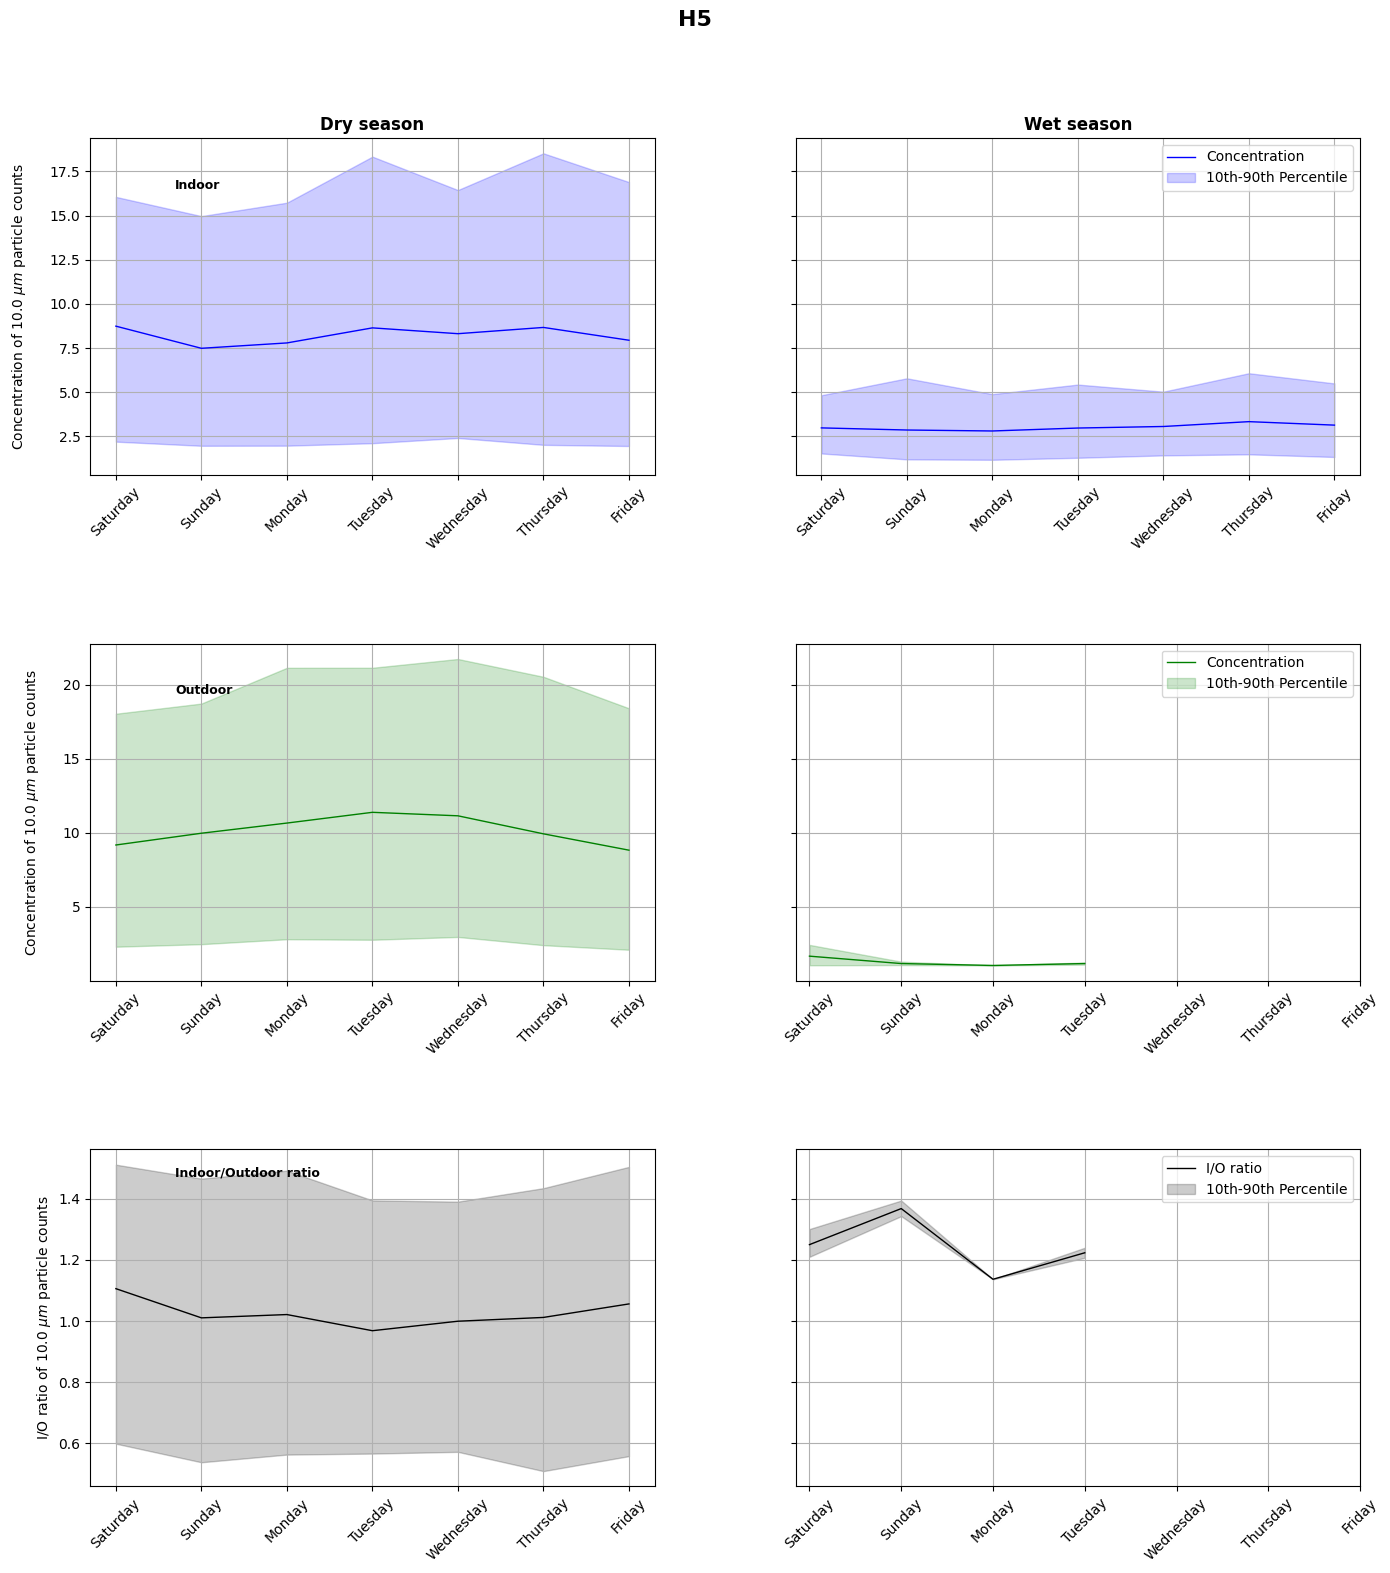

processing H6


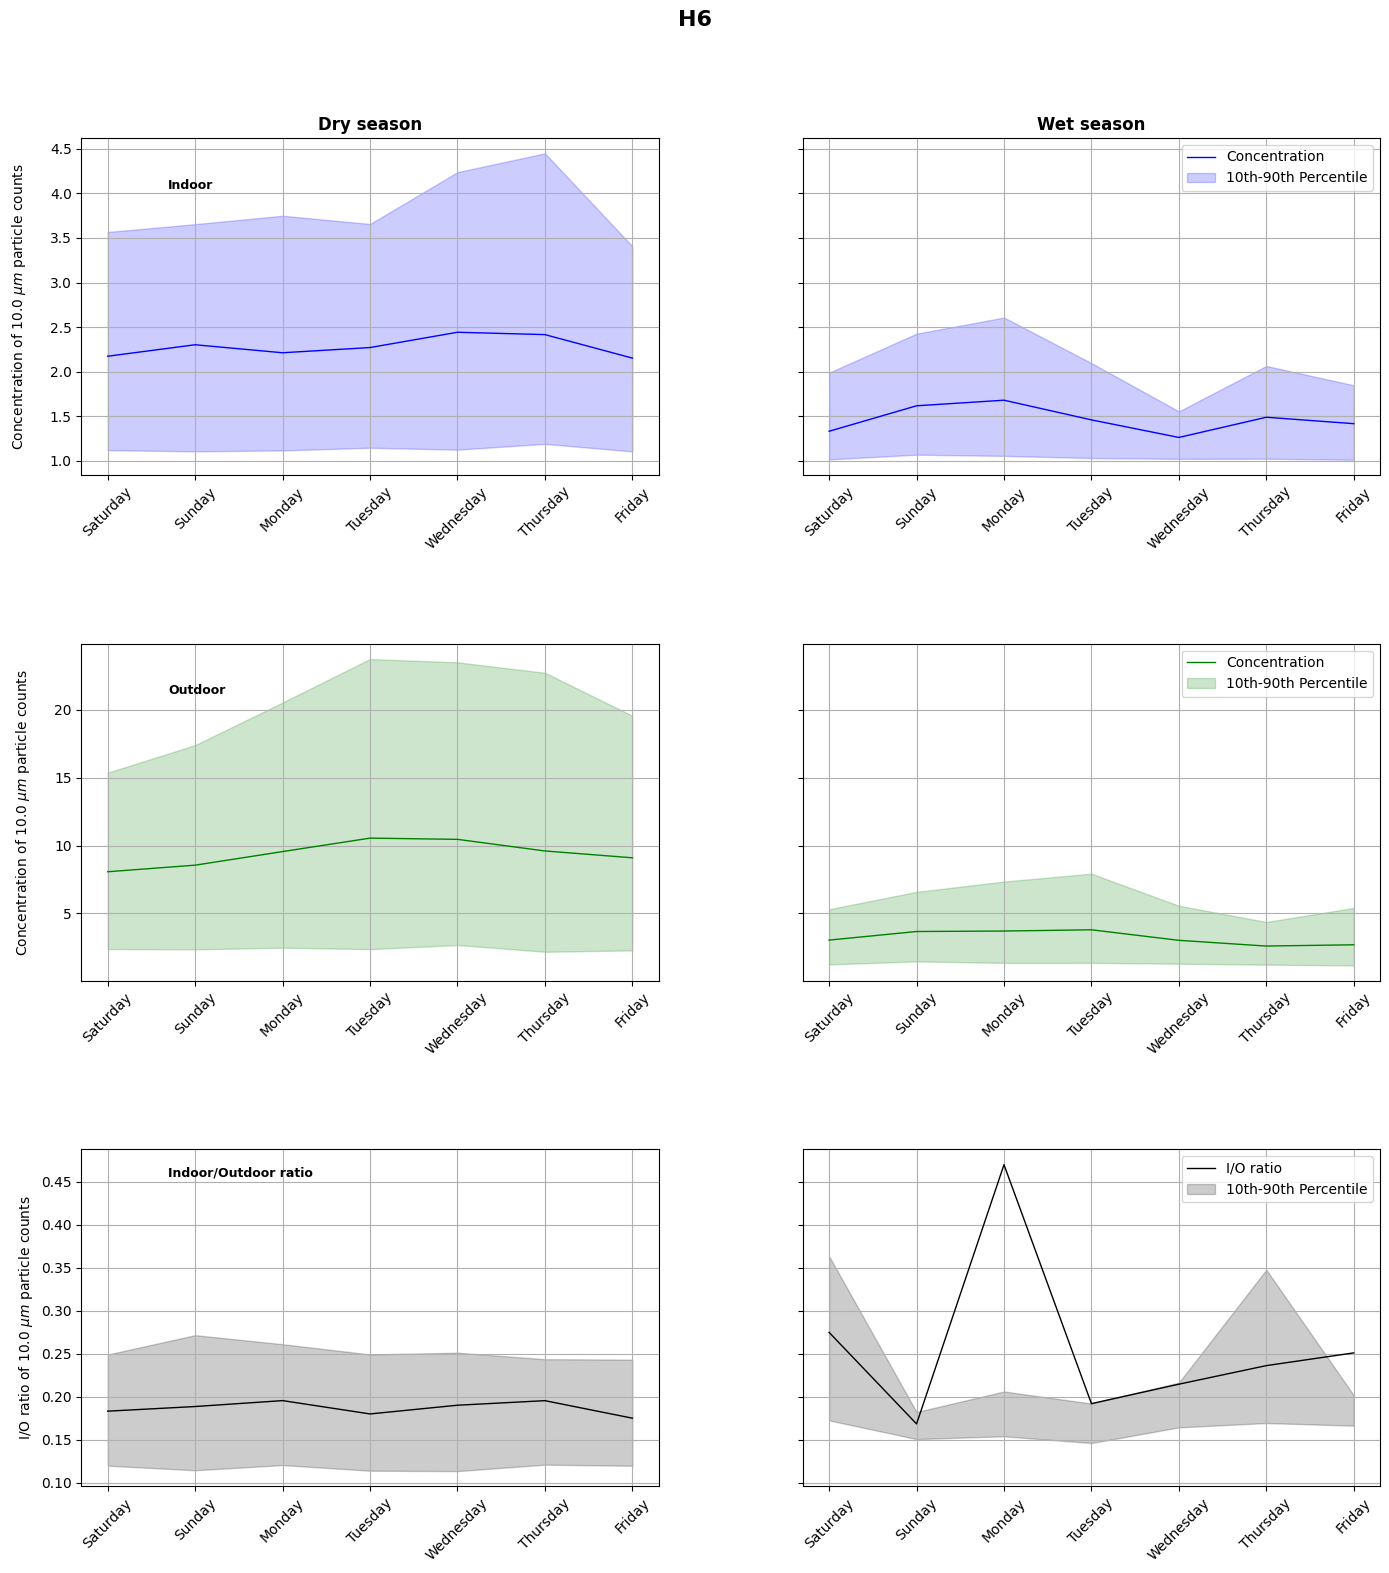

In [75]:
## I/O Time dinural (full)
## plotting

dir = 'hourly_average'
savedir = 'graphs/weekly variations'

# subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) if "Home" in d]
subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
# subdirs = ['Dhakeshwari Home']

for home in subdirs:
    print(f"processing {home}")
    indoor_df = pd.read_csv(f'hourly_average/{home}/Indoor.csv')
    indoor_df['time'] = pd.to_datetime(indoor_df['time'])
    indoor_df = indoor_df[['time', CURR_COL]]
    indoor_df.columns = ['time', 'pm2_5_indoor']

    outdoor_df = pd.read_csv(f'hourly_average/{home}/Outdoor.csv')
    outdoor_df['time'] = pd.to_datetime(outdoor_df['time'])
    outdoor_df = outdoor_df[['time', CURR_COL]]
    outdoor_df.columns = ['time', 'pm2_5_outdoor']

    combined_df = pd.merge(indoor_df, outdoor_df, how='inner', on='time')
    combined_df['IO_ratio'] = combined_df['pm2_5_indoor'] / combined_df['pm2_5_outdoor']
    combined_df['IO_ratio'] = combined_df['IO_ratio'].apply(lambda x: x if (x > 0) else float('nan'))
    combined_df['day_name'] = combined_df['time'].dt.day_name()
    if home in ["Dania Home", "Badda Home"]:
        combined_df = combined_df[combined_df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])].copy()

    wet_df_combined = combined_df[combined_df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])]
    dry_df_combined = combined_df[combined_df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])]

    targets = [
        ('pm2_5_indoor',  in_color,  (0, 300),  f"Concentration of {VAR_LATEX}" + "\n" + f"{VAR_UNIT}", "Concentration", 'Indoor'),
        ('pm2_5_outdoor', out_color, (0, 300),  f"Concentration of {VAR_LATEX}" + "\n" + f"{VAR_UNIT}", "Concentration", "Outdoor"),
        ('IO_ratio',      ratio_color, (0.5, 1.25), f"I/O ratio of {VAR_LATEX}", "I/O ratio", "Indoor/Outdoor ratio")
    ]

    fig, axes = plt.subplots(3, 2, figsize=(14, 16), gridspec_kw={'width_ratios': [50, 50]}, sharey='row')
    i = 0
    for target, color, ylim, ylabel, legend, item in targets:
        day_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

        # ---------- UPDATED: ensure all days are present, ordered, and plotted on a fixed x grid ----------
        dinural_dry = (
            dry_df_combined.groupby('day_name')[target].agg(
                mean='mean',
                Q10=lambda x: x.quantile(.10),
                Q90=lambda x: x.quantile(0.9)
            )
            .reindex(day_order)    # include missing days as NaN
            .reset_index()
            .rename(columns={'index': 'day_name'})
        )
        dinural_wet = (
            wet_df_combined.groupby('day_name')[target].agg(
                mean='mean',
                Q10=lambda x: x.quantile(0.1),
                Q90=lambda x: x.quantile(0.9)
            )
            .reindex(day_order)
            .reset_index()
            .rename(columns={'index': 'day_name'})
        )

        # Fixed numeric x positions for all 7 days
        x_positions = list(range(len(day_order)))
        dinural_dry['x'] = x_positions
        dinural_wet['x'] = x_positions
        # ---------------------------------------------------------------------------------------------------

        j = 0
        for df, name in [(dinural_dry, 'Dry'), (dinural_wet, 'Wet')]:
            ax = axes[i, j]

            # ---------- UPDATED: plot using fixed numeric x, then set ticks/labels ----------
            ax.plot(df['x'], df['mean'], label=legend, color=color, linestyle='-', markersize=3, linewidth=1)
            ax.fill_between(df['x'], df['Q10'], df['Q90'], color=color, alpha=0.2, label='10th-90th Percentile')
            ax.set_xticks(x_positions)
            ax.set_xticklabels(day_order, rotation=45)
            # --------------------------------------------------------------------------------

            if j == 0:
                ax.set_ylabel(ylabel)
            if i == 0:
                ax.set_title(f'{name} season', fontsize=12, fontweight='bold')
            if j == 1:
                ax.legend()
            ax.grid(True)
            # ax.set_ylim(ylim)
            if j == 0:
                if i == 2:
                    ax.text(0.15, 0.92, item, fontsize=9, fontweight='bold', transform=ax.transAxes)
                else:
                    ax.text(0.15, 0.85, item, fontsize=9, fontweight='bold', transform=ax.transAxes)
            j += 1
        i += 1

    plt.suptitle(f"{home.split(' ')[0]}", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.25, hspace=0.5)
    plt.subplots_adjust(top=0.9)

    plt.savefig(f"graphs/{VAR_NAME}/weekly/{home.split(' ')[0]}.png", dpi=300)
    plt.show()


In [ ]:
    i = 0
    for target, color, ylim, ylabel, legend, item in targets:
        day_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

        dinural_dry = dry_df_combined.groupby('day_name')[target].agg(
                                                                            mean='mean',
                                                                            Q10=lambda x: x.quantile(.10),
                                                                            Q90=lambda x: x.quantile(0.9)
                                                                        ).reset_index()
        dinural_dry["day_name"] = pd.Categorical(dinural_dry["day_name"], categories=day_order, ordered=True)
        dinural_dry = dinural_dry.sort_values("day_name").reset_index(drop=True)
        dinural_wet = wet_df_combined.groupby('day_name')[target].agg(
                                                                            mean='mean',
                                                                            Q10=lambda x: x.quantile(0.1),
                                                                            Q90=lambda x: x.quantile(0.9)
                                                                        ).reset_index()
        dinural_wet["day_name"] = pd.Categorical(dinural_wet["day_name"], categories=day_order, ordered=True)
        dinural_wet = dinural_wet.sort_values("day_name").reset_index(drop=True)

        j = 0
        for df, name  in [(dinural_dry, 'Dry'), (dinural_wet, 'Wet')]:
            ax = axes[i, j]

            # Plot the PM2.5 concentrations
            ax.plot(df['day_name'], df['mean'], label=legend, color=color, linestyle='-', markersize=3, linewidth = 1)
            ax.fill_between(df['day_name'], df['Q10'], df['Q90'], 
                    color=color, alpha=0.2, label='10th-90th Percentile')
            
            
            if j == 0:
                ax.set_ylabel(ylabel)
            if i == 0:
                ax.set_title(f'{name} season', fontsize = 14, fontweight = 'bold')
            if j == 1:
                ax.legend()
            ax.grid(True)
            ax.set_ylim(ylim)
            ax.text(0.3, ylim[1] * .9, item, fontsize = 12, fontweight = "bold")
            ax.set_xticklabels(day_order, rotation = 45)
            j += 1
        i += 1


    plt.suptitle(f'{home.split(' ')[0]}', fontsize = 18, fontweight = 'bold')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.25, hspace=0.3)     
    plt.subplots_adjust(top=0.9)  # Adjust top spacing to move plots down
 
    #plt.savefig(os.path.join(savedir, f'{home.split(' ')[0]}.png'), dpi = 300)
    plt.show()


Processed H1
Processed H2
Processed H3
Processed H4
Processed H5
Processed H6
I/O ratio dry : 0.7117477649435938 +- 1.4302153273405036
I/O ratio wet : 0.3970960551722287 +- 0.45166903329821045


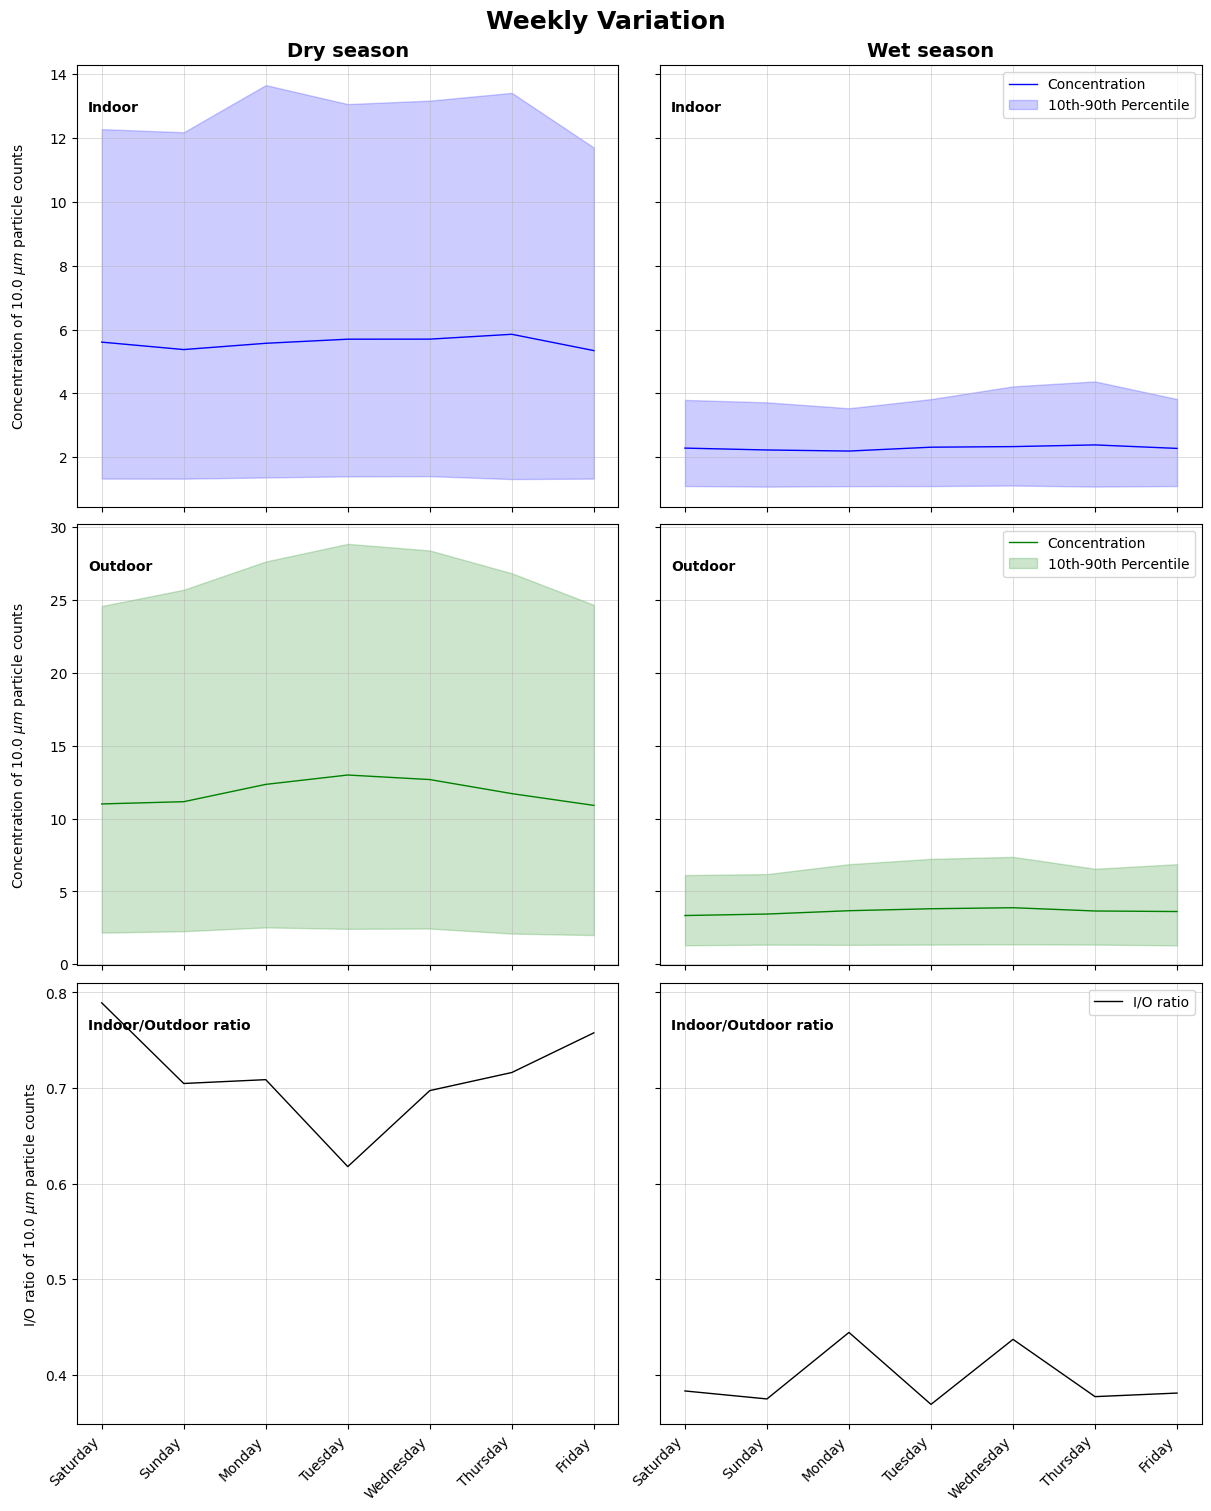

In [76]:
## I/O Time dinural (full)
## plotting

dir = 'hourly_average'
savedir = 'graphs/weekly variations'

# subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) if "Home" in d]
subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
indoor_dfs = []
outdoor_dfs = []
combined_dfs = []

for home in subdirs:
    indoor_df = pd.read_csv(f'hourly_average/{home}/Indoor.csv')
    indoor_df['time'] = pd.to_datetime(indoor_df['time'])
    indoor_df = indoor_df[['time', CURR_COL]]
    indoor_df.columns = ['time', 'pm2_5_indoor']
    indoor_dfs.append(indoor_df)

    outdoor_df = pd.read_csv(f'hourly_average/{home}/Outdoor.csv')
    outdoor_df['time'] = pd.to_datetime(outdoor_df['time'])
    outdoor_df = outdoor_df[['time', CURR_COL]]
    outdoor_df.columns = ['time', 'pm2_5_outdoor']
    outdoor_dfs.append(outdoor_df)

    combined_df = pd.merge(indoor_df, outdoor_df, how='inner', on='time')
    combined_df['IO_ratio'] = combined_df['pm2_5_indoor'] / combined_df['pm2_5_outdoor']
    combined_df['IO_ratio'] = combined_df['IO_ratio'].apply(lambda x: x if (x > 0) else float('nan'))
    combined_df['day_name'] = combined_df['time'].dt.day_name()
    if home in ["Dania Home", "Badda Home"]:
        combined_df = combined_df[combined_df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])].copy()
    combined_dfs.append(combined_df)
    print(f"Processed {home}")

combined_df = pd.concat(combined_dfs)

wet_df_combined = combined_df[combined_df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])]
dry_df_combined = combined_df[combined_df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])]

wet_io = wet_df_combined['IO_ratio']
dry_io = dry_df_combined['IO_ratio']

print(f"I/O ratio dry : {np.mean(dry_io)} +- {np.std(dry_io)}")
print(f'I/O ratio wet : {np.mean(wet_io)} +- {np.std(wet_io)}')

targets = [
    ('pm2_5_indoor',  in_color,  (0, 300),   f"Concentration of {VAR_LATEX}\n{VAR_UNIT}", "Concentration", 'Indoor'),
    ('pm2_5_outdoor', out_color, (0, 300),   f"Concentration of {VAR_LATEX}\n{VAR_UNIT}", "Concentration", "Outdoor"),
    ('IO_ratio',      ratio_color, (0.8, 0.9), f"I/O ratio of {VAR_LATEX}",               "I/O ratio", "Indoor/Outdoor ratio")
]

home = "Full Data"

# --- Use constrained layout to avoid manual spacing hacks ---
fig, axes = plt.subplots(3, 2, figsize=(12, 15),
                         gridspec_kw={'width_ratios': [50, 50]},
                         sharey='row', constrained_layout=True)

day_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
x_positions = np.arange(len(day_order))   # 0..6  (fixed x grid for both columns)

i = 0
for target, color, ylim, ylabel, legend, item in targets:

    # Build day stats and include ALL days in order
    dinural_dry = (
        dry_df_combined.groupby('day_name')[target].agg(
            mean='mean',
            Q10=lambda x: x.quantile(.10),
            Q90=lambda x: x.quantile(0.9)
        ).reindex(day_order).reset_index().rename(columns={'index': 'day_name'})
    )
    dinural_wet = (
        wet_df_combined.groupby('day_name')[target].agg(
            mean='mean',
            Q10=lambda x: x.quantile(0.1),
            Q90=lambda x: x.quantile(0.9)
        ).reindex(day_order).reset_index().rename(columns={'index': 'day_name'})
    )
    dinural_dry['x'] = x_positions
    dinural_wet['x'] = x_positions

    j = 0
    for df, name in [(dinural_dry, 'Dry'), (dinural_wet, 'Wet')]:
        ax = axes[i, j]

        # Plot against numeric x; this keeps spacing consistent even with NaNs
        ax.plot(df['x'], df['mean'], label=legend, color=color, linestyle='-', markersize=3, linewidth=1)
        if target != 'IO_ratio':
            ax.fill_between(df['x'], df['Q10'], df['Q90'], color=color, alpha=0.2, label='10th-90th Percentile')

        # Axes formatting
        # ax.set_xlim(-0.5, 6.5)
        # ax.set_ylim(*ylim)                    # ensure consistent panel heights
        ax.set_xticks(x_positions)
        if i == 2:
            ax.set_xticklabels(day_order, rotation=45, ha='right')
        else:
            ax.set_xticklabels([])

        if j == 0:
            ax.set_ylabel(ylabel)
        if i == 0:
            ax.set_title(f'{name} season', fontsize=14, fontweight='bold')
        if j == 1:
            ax.legend(loc='upper right', frameon=True)

        ax.grid(True, linewidth=0.6, alpha=0.5)

        # Place the small panel label in AXES coordinates (so it never “floats”)
        ax.text(0.02, 0.92, item, transform=ax.transAxes,
                fontsize=10, fontweight='bold', va='top')

        j += 1
    i += 1

fig.suptitle('Weekly Variation', fontsize=18, fontweight='bold')
plt.show()
